# Biological Computing in Python

<!-- **First, the UNIX Chapter's challenge question!**
```bash
find . -type f -exec ls -s {} \; | sort -n | head -10
```
*What is the command doing? How has it been built (explain the components)?* -->

```{epigraph}
...some things in life are bad. They can really make you mad. Other things just make you swear and curse. When you're chewing on life's gristle, don't grumble; give a whistle, and this'll help things turn out for the best. And... always look on the bright side of life... 

-- Monty Python

```

## Introduction

Python is a modern, easy-to-write, interpreted (semi-compiled) programming language that was conceived with readability of code in mind. It has a numerous of feature-rich packages that can be used for a wide variety of biological applications and analyses.

This chapter is intended to teach you scientific programming in biology using Python. Specifically, you will learn:

* Basics of Python syntax and data structures

* Python's object-oriented features

* Learning to use the `ipython` environment

* How to write and run python code

* Understand and implement Python control flow tools

* Writing, debugging, using, and testing Python functions

* Learning efficient numerical programming in Python

* Using regular expressions in Python

* Introduction to particularly useful Python packages

* Using Python to run other, non-python tasks and code

* Using Python to patch together data analysis and/or numerical simulation work flows

(05-Python_I:Why-python)=
### Why Python?

Python was designed with readability and re-usability in mind. Time taken by programming + debugging + running is likely to be relatively lower in python than less intuitive or cluttered languages (e.g., FORTRAN, Perl). 

Python is a pretty good solution if you want to easily write readable code that is also reasonably efficient computationally (see the figure below). 

---
:::{figure-md}
<img src="./graphics/benchmarks.svg" alt="Language speeds" width="700px">

**Python's numerical computing performance compared to some others**. Smaller numbers are better. Note that the y-axis is in $\log_{10}$ scale. <br>
(Source: <http://julialang.org/>)

:::

---

### Python versions 

We will use python 3; For python 2 vs 3 history, [read this](https://wiki.python.org/moin/Python2orPython3).

(05-Python_I:Some-terminology)=
### Some terminology 

*What does "float" mean?* You will inevitably run into some such jargon in this chapter. The main ones you need to know are (you will learn more about these along the way):

| Term | Meaning | 
|:-|:-| 
|Workspace | The "environment" of your current python *session*, including all variables, functions, objects, etc.|
|Variable| A named number, text string, boolean (`True` or `False`), or data structure that can change (more on variable and data types later)|
|Function| A computer procedure or routine that performs operations and returns some value(s), and which can be used again and again|
|Module| *Variables* and *functions* packaged into a single set of programs that can be invoked as a re-useable command (potentially with sub-commands)|
|Class| A way of grouping *Variables* and *functions* into a single object with specific properties that are inherited when you create its copy. Unlike *modules*, you can create ("spawn") many copies of a *class* within a python session or program|
|Object|  A particular instance of a class (every object belongs to a class) that is created in a session and eventually destroyed; everything in your workspace is an object in python!|

This Module vs. Class vs. Object business is confusing. These constructs are created to make an (object-oriented) programming language like Python more flexible and user friendly (though it might not seem so to you currently!). In practice, at least for your current purposes, you will not build you own python classes much (but will use the inbuilt Python classes).You will however write your own modules. More on all this later (in the second Python Chapter). 

```{note}
**Data "structures" vs. "objects"**: You will often see the terms "object" and "data structure" used in this and other chapters. These two have a very distinct meaning in object-oriented programming (OOP) languages like Python and R. A data structure is just a "dumb" container for data (e.g., a vector). An object, on the other hand can be a data structure, but also any other variable or a function. Python, being an OOP language, converts everything in the current environment to an object so that it knows what to do with each such entity &mdash; each object type has its own set of rules for operations and manipulations that Python uses when interpreting your commands. 
```

## Getting started with Python

OK, so let's get started with Python. 

$\star$ In your bash terminal (or by opening a new one with `ctrl+alt+t`), type:

```bash
python3
```
You will get a new command prompt that looks like this:
```
>>>
```

### Baby steps

Now, try some simple operations:

In [7]:
2 + 2 # Summation; note that comments still start with #

4

In [8]:
2 * 2 # Multiplication

4

In [9]:
2 / 2 # division

1.0

To specify an integer division, use `//`:

In [10]:
2//2

1

In [11]:
2 > 3 # logical operation

False

In [12]:
2 >= 2 # another one

True

## The Zen of Python and good programming practices

Type this in your Python terminal:

In [13]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


They are Python's programming principles.

*Think about and discuss with your class/coursemates what each of these programming principles mean.* 

The "Dutch" in one of them refers to  Guido van Rossum, inventor of the python language. 

[Here](https://inventwithpython.com/blog/2018/08/17/the-zen-of-python-explained/)'s one set of interpretations of these.

In the rest of this chapter you are going to learn the following key elements of good programming practices, which you will then build upon in subsequent chapters:

```{note}
Adhering to these practices will result in more maintainable, efficient, and scalable code, enhancing collaboration and reducing future technical load, **irrespective of programming language**. 
```

1. **Write Clear, Readable Code**
   - Use names that clearly describe their purpose (meaningful variable / function / object names).
   - Stick to a single naming convention/style (e.g., [camelCase](https://simple.wikipedia.org/wiki/CamelCase), [snake_case](https://en.wikipedia.org/wiki/Snake_case)).
   - Provide concise comments and document code sections to explain their logic, especially for complex parts.

2. **Make it Modular to the Max!**
   - Functions (or "methods" - coming up later below) should perform one task (the ["Single Responsibility Principle (SRP)"](https://en.wikipedia.org/wiki/Single-responsibility_principle)).
   - Break down large tasks into smaller, reusable functions.
   - Avoid duplicating code; encapsulate repetitive logic in functions ([the "Don't Repeat Yourself (DRY)" principle](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)).

3. **Handle Errors Gracefully**
   - Use `try-except` blocks or other error-handling mechanisms to anticipate failures and handle them without crashing the program (coming up later in this Chapter).
   - Provide meaningful error messages that help others (and yourself in the future!) understand what went wrong and how to fix it.

4. **Test, Test, Test!**
   - Write automated tests for individual units of code to ensure they behave as expected.
   - Test code during development to catch bugs before they become difficult to track.

5. **[Version Control](./03-Git.ipynb)**
   - Commit frequently, with clear commit messages describing the purpose of the changes.
   - Develop new features, solutions, or bug fixes in separate branches to avoid conflicts in the main branch.

6. **Optimization**
   - Write code that minimizes time (make it faster) and space (make its RAM usage smaller) complexity where possible.
   - But focus first on functionality, then optimize only where performance is actually a bottleneck. Remember Donald Knuth's quote: "*Premature optimizaton is the root of all evil*"! 

7. **Use Consistent Code Style**
   - Adhere to style guides (e.g., PEP 8 for Python - coming up below) to keep code consistent.
   - Use automated tools to enforce coding standards and detect errors (use code formatting and linting tools).

8. **Review Code**
   - Have others review your code to catch issues and get feedback on design and implementation.
   - Collaborative - use feedback from opthers to refine code and learn better practices.

9. **Avoid Hardcoding!**
   - Avoid hardcoding parameter values (e.g., absolute file paths, values of certain constants, settings) directly into the program. Use external inputs, global constants and external configuration files instead.

10. **Refactor Regularly**
   - Continuously improve code by removing redundancies, simplifying logic, or improving structure without changing functionality (aka "Refactoring code").
   - Watch for and address patterns that indicate poor design (software nerds call it "Code smell detection"!):
       - Duplicated code lines/blocks
       - Overly complex functions (too long, performing multiple tasks, difficult to understand)
       - Tightly coupled code (different components/functions/modules are so dependent on each other that changes in one requires changes in the other(s)). 

## ipython

Let's switch to the `i`nteractive python shell, `ipython` that you installed above.

$\star$ Type `ctrl+D` in the terminal at the python prompt: this will exit you from the python shell and you will see the bash prompt again.

Now type 
```bash
ipython3
```

After some text, you should now see the ipython prompt:

```bash
In [1]:
``` 

The ipython shell has many advantages over the bare-bones, non-interactive python shell (with the `>>>` prompt). For example, as in the bash shell, `TAB` leads to auto-completion of a command or file name (try it).

### Magic commands

IPython has "magic commands" (which start with % ; e.g., `%run`). Here are some useful magic commands:

|  Command       |  What it does     |
|:-  |:- | 
| `%who` | Shows current namespace (all variables, modules and functions)| 
| `%whos`| Also display the type of each variable; typing ` %whos function` only displays functions etc.| 
| `%pwd`| Print working directory| 
| `%history`|    Print recent commands| 

You can try any or all of these now. For example:

In [14]:
%who

this	 x	 y	 


That is, there are no objects in your workspace yet. Let's create one:

In [15]:
a = 1

In [16]:
%who

a	 this	 x	 y	 


In [17]:
%whos

Variable   Type      Data/Info
------------------------------
a          int       1
this       module    <module 'this' from '/usr<...>/lib/python3.10/this.py'>
x          int       0
y          int       2


### Determining an object's type

Another useful IPython feature is the question mark, which can be used to find what a particular Python object is, including variables you created. For example, try: `?a`

This will give you detailed information about this variable (which is an object, belonging to a particular class, because this is python!). 

You can also check a variable's type: 

In [18]:
type(a)

int

```{tip}
You can configure ipython's environment and behavior by editing the `ipython_config.py` file, which is located in the `.ipython` directory of your `home` (on Linux/Ubuntu). This file does not initially exist, but you can create it by running `ipython profile create [profilename]` in a bash terminal. Then, edit it. For example, on Ubuntu you can 

`nano ~/.ipython/profile_default/ipython_config.py &`

And then make the changes you want to the default ipython configuration. For example, If you don't like the blue
`ipython` prompt, you can type `%colors linux` (once inside the shell). If you want to make this color the default, then edit the `ipython_config.py` — search for "Set the color scheme" option in the file.
```

(05-Python_I:Python-variables)=
## Python variables

Now, let's continue our python intro. We will first learn about the python variable types that were mentioned above. The types are:

In [19]:
a = 2 #integer
type(a)

int

In [20]:
a = 2. #Float
type(a)

float

In [21]:
a = "Two" #String
type(a)

str

In [22]:
a = True #Boolean
type(a)

bool

*Thus, python has integer, float (real numbers, with different precision levels) string and boolean variables.*

Also, try `?a` after defining `a` to be a boolean variable, and note this output in particular:

```python
The builtins True and False are the only two instances of the class bool. The class bool is a subclass of the class int, but with only two possible values. 
```
The idea of what a class is hopefully be a little bit clearer to you now. 

```{note}
In Python, the type of a variable is determined when the program or command is running (dynamic typing) (like `R`, unlike `C` or `FORTRAN`). This is convenient, but can make programs slow. More on efficient computing [later](./06-Python_II.ipynb).
```


### Python operators

Here are the operators that you can use on variables in python:

|  Operator   |            |
|:------------- |:-------------| 
| `+`|             Addition|
|  `-`|             Subtraction
|  `*` |                         Multiplication
|  `/`  |           Division
|  `**`  |          Power
|  `%`    |         Modulo
|  `//`   |         Integer division
|  `==`   |         Equals
|  `!=`   |         Differs
|  `>`  |         Greater
|  `>=` |         Greater or equal
|  `&, and` |        Logical AND
|  $\vert$ , `or` |   Logical OR
|  `!, not` |       Logical NOT

### Assigning and manipulating variables

Try the following:

In [23]:
2 == 2

True

In [24]:
2 != 2

False

In [25]:
3 / 2

1.5

In [26]:
3 // 2

1

*What happened here*? This is an integer division, so the decimal part is lost.  

In [27]:
'hola, ' + 'me llamo Samraat' #why not learn two human languages at the same time?! 

'hola, me llamo Samraat'

In [28]:
x = 5

In [29]:
x + 3

8

In [30]:
y = 2

In [31]:
x + y

7

In [32]:
x = 'My string'

In [33]:
x + ' now has more stuff'

'My string now has more stuff'

In [34]:
x + y

TypeError: can only concatenate str (not "int") to str

Doesn't work. No problem, we can convert from one type to another:

In [35]:
x + str(y)

'My string2'

In [36]:
z = '88'

In [37]:
x + z

'My string88'

In [38]:
y + int(z)

90

## Python data structures

Python variables can be stored and manipulated in:

| | |
|:-  |:- | 
|*List*: |most versatile, can contain mixed data, are "mutable" (elements can can be modified), and can contain duplicates; created by enclosing in square brackets, `[ ]`|
|*Tuple*: |like a list, but "immutable" — like a read only list; created by enclosing in round brackets, `( )`|
|*Dictionary*: | a kind of "hash table" of key-value pairs where the key can be number or string and values can be any python object, but there can be only unique key-value pairs; created by enclosing in curly brackets, `{ }`|
|*numpy arrays*: |Fast, compact, convenient for numerical computing — more on this later!|

```{note}
What about [Pandas](https://pandas.pydata.org/) [arrays](https://pandas.pydata.org/docs/reference/api/pandas.array.html) as a data structure? We will learn about them later. These are inherently slower (less computationally efficient) than `numpy` arrays, and are best used in the right context (e.g., they make data exploration or visualizations more convenient, or apply functions designed to run optiomally on them). 
```


### Lists

These are the most versatile, and can contain compound data. They are "mutable", as will be illustrated below. Try this:

In [39]:
MyList = [3,2.44,'green',True]

In [40]:
MyList[1]

2.44

In [41]:
MyList[0]

3

*Note that python "indexing" starts at 0, not 1!*

In [43]:
MyList[4]

IndexError: list index out of range

As expected!

In [45]:
MyList[2] = 'blue'

In [46]:
MyList

[3, 2.44, 'blue', True]

In [47]:
MyList.append('a new item')

Note `.append`. This is an operation (a "method") that can be applied to any "object" with the "class" list. You can check the type of any object: 

In [48]:
%whos

Variable   Type      Data/Info
------------------------------
MyList     list      n=5
a          bool      True
this       module    <module 'this' from '/usr<...>/lib/python3.10/this.py'>
x          str       My string
y          int       2
z          str       88


In [49]:
type(MyList)

list

In [50]:
print(type(MyList))

<class 'list'>


```{note}
In Python3 there is no difference between "class" and "type". They are in most cases used as synonyms.
```

In [51]:
MyList

[3, 2.44, 'blue', True, 'a new item']

In [52]:
del MyList[2]

In [53]:
MyList

[3, 2.44, True, 'a new item']

```{tip}
Note that in ipython you can suffix an `.` to a particular object (e.g., `MyList.`), and then hit tab to see the methods that can be applied to that object. 
```

### Tuples

Tuples are like a list, but "immutable", that is, a *particular pair* or sequence of strings or numbers cannot be modified after it is created. So a tuple is like a read-only list.

In [54]:
MyTuple = ("a", "b", "c")

In [55]:
print(MyTuple)

('a', 'b', 'c')


In [56]:
type(MyTuple)

tuple

In [57]:
MyTuple[0]

'a'

In [58]:
len(MyTuple)

3

Tuples are particularly useful when you have sets (pairs, triplets, etc) of items associated with each other that you want to store such that those associations cannot be modified. 

Try this:

In [59]:
FoodWeb=[('a','b'),('a','c'),('b','c'),('c','c')]
FoodWeb

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'c')]

So we created a list of tuples (note the use of square brackets `[]`)

In [60]:
FoodWeb[0]

('a', 'b')

In [61]:
FoodWeb[0][0]

'a'

In [62]:
FoodWeb[0][0] = "bbb"

TypeError: 'tuple' object does not support item assignment

Thus, tuples are "immutable"!

However, you can change a whole pairing: 

In [65]:
FoodWeb[0] = ("bbb","ccc") 

In [66]:
FoodWeb[0]

('bbb', 'ccc')

*In the above example, why assign these food web data to a list of tuples and not a list of lists?* — because we want to maintain the species associations, no matter what — they are sacrosanct.

Thus, you cannot:

* add elements to a tuple. Tuples have no *inbuilt* append or extend method (but you can append to them with a bit of extra work - see below).
* remove elements from a tuple. Tuples have no remove method.

But you can:
* find elements in a tuple, since this doesn't change the tuple.
* use the `in` operator to check if an element exists in the tuple or iterate over them (explained in the control flow tools sections below).

The key point is that tuples are faster than lists, as you might expect for an immutable object (it has a fixed memory space, which makes it more efficient to retrieve). using tuples also makes your code safer as it effectively write-protects data (as long as you don't plan to modify those particular data).

Tuples may be immutable, but you *can* append to them by first creating an "empty space" for the new item:

In [67]:
a = (1, 2, []) 
a

(1, 2, [])

In [68]:
a[2].append(1000)
a

(1, 2, [1000])

In [69]:
a[2].append(1000)
a

(1, 2, [1000, 1000])

In [70]:
a[2].append((100,10))
a

(1, 2, [1000, 1000, (100, 10)])

You can also concatenate, slice and dice them as long as they contain a single sequence or set of items:

In [71]:
a = (1, 2, 3)

In [72]:
b = a + (4, 5, 6)
b

(1, 2, 3, 4, 5, 6)

In [73]:
c = b[1:]
c

(2, 3, 4, 5, 6)

In [74]:
b = b[1:]
b

(2, 3, 4, 5, 6)

They can be a heterogeneous set as well. 

In [75]:
a = ("1", 2, True)
a

('1', 2, True)

### Sets

You can convert a list to an mutable "set" — an unordered collection with no duplicate elements. Once you create a set you can perform set operations on it:

In [76]:
a = [5,6,7,7,7,8,9,9]

In [77]:
b = set(a)

In [78]:
b

{5, 6, 7, 8, 9}

In [79]:
c = set([3,4,5,6])

In [80]:
b & c # intersection

{5, 6}

In [81]:
b | c # union

{3, 4, 5, 6, 7, 8, 9}

The key set operations in python are:

| Operation | Command |
|:- |:- |
| `a - b `|        a.difference(b)|
| `a <= b` |     a.issubset(b)|
| `a >= b`  |    b.issubset(a)|
| `a & b`    |     a.intersection(b)|
| `a` $\vert$ `b`|   a.union(b)|

You can also convert tuples to sets:

In [82]:
# Define a tuple
my_tuple = (1, 2, 3, 4, 5)

# Convert tuple to set
my_set = set(my_tuple)

# Print the set
print(my_set)

{1, 2, 3, 4, 5}


### Dictionaries

A dictionary is a set of values (any python object) indexed by keys (string or number). So they are a bit like `R` lists.

In [83]:
GenomeSize = {'Homo sapiens': 3200.0, 'Escherichia coli': 4.6, 'Arabidopsis thaliana': 157.0}

In [84]:
 GenomeSize

{'Homo sapiens': 3200.0,
 'Escherichia coli': 4.6,
 'Arabidopsis thaliana': 157.0}

In [85]:
GenomeSize['Arabidopsis thaliana']

157.0

In [86]:
GenomeSize['Saccharomyces cerevisiae'] = 12.1

In [87]:
GenomeSize

{'Homo sapiens': 3200.0,
 'Escherichia coli': 4.6,
 'Arabidopsis thaliana': 157.0,
 'Saccharomyces cerevisiae': 12.1}

In [88]:
GenomeSize['Escherichia coli'] = 4.6 

In [89]:
GenomeSize

{'Homo sapiens': 3200.0,
 'Escherichia coli': 4.6,
 'Arabidopsis thaliana': 157.0,
 'Saccharomyces cerevisiae': 12.1}

Because 'Escherichia coli' is already in the dictionary, it is not repeated.

In [90]:
GenomeSize['Homo sapiens'] = 3201.1

In [91]:
GenomeSize

{'Homo sapiens': 3201.1,
 'Escherichia coli': 4.6,
 'Arabidopsis thaliana': 157.0,
 'Saccharomyces cerevisiae': 12.1}

```{note}
Tuples that contain immutable values like strings, numbers, and other tuples  can be used as dictionary keys. Lists can never be used as dictionary keys, because they are mutable. 
```

Also, every dictionary key must be unique.  If you try to add a new key-value pair to a dictionary using a key that already exists, the new value will overwrite the previous value associated with that key.

Try this: 

In [92]:
# Define a dictionary with duplicate keys
my_dict = {'a': 1, 'b': 2, 'a': 3}

# Print the dictionary
print(my_dict)

{'a': 3, 'b': 2}


In summary, the guidelines for choosing a Python data structure are:

* If your elements/data are unordered and indexed by numbers use a *list*
* If you're defining a constant set of values (or ordered sequences) and all you're ever going to do with them is iterate through them, use a *tuple*.
* If you want to perform set operations on data, use a *set*
* If they are unordered and indexed by keys (e.g., names), use a  *dictionary*

*But why not use dictionaries for everything?* – because it can slow down your code!

### Copying mutable objects

Copying mutable objects can be tricky because by default, when you create a new variable based on an existing one, Python only creates a reference to the original (that is it does not create a new, duplicate variable in memory as such). To understand this, let's see an example. 

First, try this:

In [93]:
a = [1, 2, 3]
b = a

Here, you have not really copied, but merely created a new "tag" (like a label) for `a`, called `b`.

In [94]:
a.append(4)

In [95]:
print(a)
print(b)

[1, 2, 3, 4]
[1, 2, 3, 4]


So `b` changed as well! This is because `b` is just a "pointer" or "reference" to `a`, not an actual copy in memory.

Now, try:

In [96]:
a = [1, 2, 3]
b = a[:]  # This is a "shallow" copy; one level deep

In [97]:
a.append(4)
print(a)
print(b)

[1, 2, 3, 4]
[1, 2, 3]


That worked! But what about more complex lists? Try this nested list:

In [98]:
a = [[1, 2], [3, 4]]
b = a[:]
print(a)
print(b)

[[1, 2], [3, 4]]
[[1, 2], [3, 4]]


Now, modify `a`, and then inspect both `a` and `b`:

In [99]:
a[0][1] = 22 # Note how I accessed this 2D list
print(a)
print(b)

[[1, 22], [3, 4]]
[[1, 22], [3, 4]]


So `b` still got modified!

This is because shallow copy is not recursive, that is, it does not copy beyond the first level of the list, leaving the values in the nested list still linked in memory to the  original object `a`.

The solution is to do a "deep" copy:

In [100]:
import copy

a = [[1, 2], [3, 4]]
b = copy.deepcopy(a)
a[0][1] = 22
print(a)
print(b)

[[1, 22], [3, 4]]
[[1, 2], [3, 4]]


So, you need to employ `deepcopy` to really copy an existing object or variable and assign a new name to the copy. So, in summary, shallow copying an object won't create objects that are independent clones, i.e., the copy is not fully independent of the original. A deep copy of an object will recursively clone "child" objects (like nested parts of a list). The clone is fully independent of the original, but creating a deep copy is slower, as it involves assigning new memory space. Keep in mind that this shallow vs. deep copy business does  not just apply to lists. You can copy arbitrary objects (including custom classes) with the copy module.

```{note}
**Why Python "shallow" copies objects:** This is a bit of a technical detail, but important to keep in mind: Python does shallow copying of mutable objects for (computing) performance considerations. By not copying the underlying object when you re-assign a mutable object to a new ("variable") name, Python avoids unnecessary memory usage. This is known as "passing by reference" (in contrast to passing by "value", where a new variable would be actually created in memory). That does not change the fact that shallow vs. deep copying can be confusing, of course!
```

### Python with strings

One of the things that makes python so useful and versatile, is that it has a powerful set of inbuilt commands to perform string manipulations. For example, try these:

In [101]:
s = " this is a string "
len(s) # length of s -> 18

18

In [102]:
s.replace(" ","-") # Substitute spaces " " with dashes

'-this-is-a-string-'

In [103]:
s.find("s") # First occurrence of s (remember, indexing starts at 0)

4

In [104]:
s.count("s")# Count the number of "s"

3

In [105]:
t = s.split() # Split the string using spaces and make a list 
t

['this', 'is', 'a', 'string']

In [106]:
t = s.split(" is ") # Split the string using " is " and make a list out of it
t

[' this', 'a string ']

In [107]:
t = s.strip() # remove trailing spaces
t

'this is a string'

In [108]:
s.upper()

' THIS IS A STRING '

In [109]:
s.upper().strip() # can perform sequential operations

'THIS IS A STRING'

In [110]:
'WORD'.lower() # can perform operations directy on a literal string 

'word'

### Getting help

You can do this:

```python
?s.upper
```

Also try `help()` at the python/ipython prompt. 

## Writing Python code

Now let's learn to write and run python code from a `.py` file. But first, some guidelines for good code-writing practices (also see the official [python style guide](https://www.python.org/dev/peps/pep-0008/?)):

* Wrap lines to be <80 characters long. You can use parentheses `()` or signal that the line continues using a backslash `\`
* Use either 4 spaces for indentation or tabs, but not both. (Spaces are the preferred indentation method according to [pep8](https://www.python.org/dev/peps/pep-0008/#indentation))
* Separate functions using a blank line
* When possible, write comments on separate lines

Make sure you have chosen a particular indent type (space or tab) in whatever code IDE/editor you are using — indentation is all-important in python. 

```{tip}
IDEs / code editors, by default, will typically impose consistency of which indentation (tab or 4 spaces) is used in and across Python scripts. For example, 4 spaces is usually the default, and if you use a tab (easier, quicker) to indent code while writing, the editor will automatically convert it to 4 spaces. If your code editor does not do this automatically, you should be able to configure it to do so.
```

Furthermore,

* Use "docstrings" to document how to use the code, and *comments* to explain why and how the code works (we will learn about docstrings soon, below)
* Follow naming conventions, especially:
    * `a_variable` (this is "snake case"; use underscores, not spaces in variable names)
    * `_internal_variable` (allowed, but use as a module-specific variable only)
    * `SOME_CONSTANT`
    * `a_function` (and don't use capital letters in function names)
* Never call a variable `l` or `O` or `o` (*why not?* – you are likely to confuse it with `1` or `0`!)
* Use spaces around operators and after commas:
```python
a = func(x, y) + other(3, 4)
```

### Testing/Running blocks of code 

Now that you have seen how all-important indentation of python code is. You can test a block of code, indentation and all, by pasting it directly into the ipython terminal. Let's try it. 

Type the following code in a temporary text file:

```python
for i in range(x):
    if i > 3: #4 spaces or 2 tabs in this case
        print(i)
```
Now, assign some integer value to a variable `x`:

In [111]:
x = 11

Then, paste this code at the ipython prompt (`ctrl+shift+v`), and hit enter: 

In [112]:
for i in range(x):
    if i > 3: #4 spaces or 2 tabs in this case
        print(i)

4
5
6
7
8
9
10


Of course, this code is simple, so directly pasting works. For more complex code, you may need to use the ipython `%cpaste` magic function.

(Python-loops)=
## Loops

What exactly is going on in the piece of code above? What is `i`? What does `range(x)` do?  

Basically, this piece of code runs a [loop](https://en.wikipedia.org/wiki/Control_flow#Loops) ("loops") over the full range of `x` numbers, printing each one of them. 

First, let's understand the `range()` function. This function generates, as the name suggests, a range of integers depending on the input to it. So, for example, range(10) generates 10 numbers, starting at 0:

In [113]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


The start point is 0 because this is Python (it will start at 1 in R, for example). Note that if you try to run`range()` by itself, it will not actually produce a range of numbers. For example:

In [114]:
a = range(10)
a

range(0, 10)

So all you get is the start and end point of the range, stored as `a`, whereas you might have expected to see the actual range of numbers. 

But as you saw above, this is a range of integers starting at 0, so 10 will actually not be in the set of numbers that are generated. 

The reason why `range(10)` does not give you the actual range of numbers when you call it, is that it is a "generator". It doesn't actually produce all numbers at once, but generates them only when needed (in the loop). This is (memory-)efficient, as it does not require a bunch of numbers to be stored in the RAM memory.

You can also use `range()` to generate numbers (and loop over) from a specific range of integers. For example, to generate a range from 1 to 5, do:

In [115]:
for i in range(1, 6):
    print(i)

1
2
3
4
5


Yes, it is slightly counter-intuitive that you have to use `range(1, 6)` to generate numbers from 1 to 5, but that's inevitable (and something to get used to) because of the fact that Python's indexing starts at 0!

You can also generate a set of indices that skips values using `range()` like so:

In [116]:
for i in range(2, 10, 2): # skip odd numbers
    print(i)

2
4
6
8


Play around with range a bit, and also check out its documentation. This is a very important function that you will use again and again!

```{note}
The `range()` function in  Python 2 vs Python 3 are entirely different. The Python 3 range() function is actually what is called `xrange` in Python 2. There are in fact both `range` and `xrange` functions in Python 2. `xrange`, renamed as `range`, is now the default in Python 3 because it is more memory efficient. 
```

OK, on to the variable `i` in our loop. This is a temporary placeholder for the value of `x` at each iteration of the loop (AKA the "iterator" variable). So, in the first iteration of the loop, i = 0, which is also the "index" value of the loop at that point. We have used `i`, but you can use any valid variable name, such as `j`, `k`, or even `num` (try it). 

### Iterator vs Iterable

Loops in Python work by generating and then "iterating" over an "iterator". 

In Python an "iterable" is an object that be can iterated over (e.g., a list or a tuple). In contrast, an "iterator", also an object, can iterate over an iterable (go element by element through it). An object is called iterable if we can obtain an iterator from it. Built-in Python data structures - lists, tuples, dictionaries - as well as data types like strings are iterables. 

Thus, a list is iterable but not an iterator.

Technically, in Python an iterator is generated by passing an iterable to an `iter()` method. Iterators themselves have a `__next__()` method, which returns the next item of the object. 

To see how what an iterator vs an iterable is, try out the following:

In [117]:
my_iterable = [1,2,3]

type(my_iterable)

list

In [118]:
my_iterator = iter(my_iterable)

type(my_iterator)

list_iterator

In [119]:
next(my_iterator) # same as my_iterator.__next__()

1

In [120]:
next(my_iterator)

2

In [121]:
next(my_iterator)

3

In [122]:
next(my_iterator)

StopIteration: 

Once, when you iterated all items in an iterator, and no more data are available, and a `StopIteration` exception is raised.

```{note} 
**Generator vs Iterator**: By now you might be wondering what the difference between a *generator* and an *iterator* is. The simple answer is "Every iterator is not a generator, but every generator is an iterator". Its of course not as simple as that because if you try to use the output of `range()` like a normal iterator (e.g., by applying the `next()` method to it), it will not work.  The proper answer is a bit technical, and we do not need to go into it; what matters is that `range()` works for you when looping! You can read more about the difference between generators and iterators [here](https://docs.python.org/3/library/stdtypes.html#iterator-types) and [here](https://www.geeksforgeeks.org/difference-between-iterator-vs-generator/). 
```

### Some loops examples

Write the following, and save them to `loops.py`:

```python
# FOR loops
for i in range(5):
    print(i)

my_list = [0, 2, "geronimo!", 3.0, True, False]
for k in my_list:
    print(k)

total = 0
summands = [0, 1, 11, 111, 1111]
for s in summands:
    total = total + s
    print(total)

# WHILE loop
z = 0
while z < 100:
    z = z + 1
    print(z)
```

## Functions

In python, you delineate a function (recall what a function means from the [table above](#Some-terminology)) by using indentation. For example:

In [124]:
def foo(x):
    x *= x # same as x = x*x
    print (x)
    return x

Now you will have a function object called `foo` in your workspace. You can check this using the `%whos` magic command, which lists and describes all the objects in your workspace:  

In [125]:
%whos

Variable      Type             Data/Info
----------------------------------------
FoodWeb       list             n=4
GenomeSize    dict             n=4
MyList        list             n=4
MyTuple       tuple            n=3
a             range            range(0, 10)
b             list             n=2
c             set              {3, 4, 5, 6}
copy          module           <module 'copy' from '/usr<...>/lib/python3.10/copy.py'>
foo           function         <function foo at 0x799cf02c3910>
i             int              8
my_dict       dict             n=2
my_iterable   list             n=3
my_iterator   list_iterator    <list_iterator object at 0x799cf0129000>
my_set        set              {1, 2, 3, 4, 5}
my_tuple      tuple            n=5
s             str               this is a string 
t             str              this is a string
this          module           <module 'this' from '/usr<...>/lib/python3.10/this.py'>
x             int              11
y             int           

So, `foo` is a function stored in memory (at address given by the value `0x...` in the `Data/Info` column), and ready to serve you!

Now "call it":

In [126]:
foo(2)

4


4

Note that the first,  `print` command only outputs the value of `x` to the terminal, whereas, the second `return` command actually outputs it so that you can "capture" and store it. 

To see this distinction, let's try the following.

In [127]:
def foo(x):
    x *= x # same as x = x*x
    print (x)
    return x

y = foo(2)

4


In [128]:
y

4

In [129]:
type(y)

int

Thus, the output of `foo` was stored as a new variable `y`. 

In [130]:
def foo(x):
    x *= x # same as x = x*x
    print (x)
    # return x

y = foo(2)

4


In [131]:
y

In [132]:
type(y)

NoneType

So, if we don't explicitly `return` the value of `x`, the output of `foo` cannot be stored.

## Running Python scripts

Instead of pasting or sending code to the Python command prompt like you did above, let's learn how to write it into a script and run it.  

$\star$ Write the following code into a file called `MyExampleScript.py`:

```python

def foo(x):
    x *= x # same as x = x*x
    print(x)

foo(2)
```

### Using the UNIX shell
Open another bash terminal, and `cd ` to directory where you have saved this script file. Then, run it using:

```bash
python3 MyExampleScript.py
```

### From the UNIX shell, using ipython 

Alternatively, you can use ipython:

```bash
ipython3 MyExampleScript.py
```
With the same result. 

### From within the ipython shell

You can also execute python scripts from within the `ipython` shell with 

```python
%run MyExampleScript.py
```

That is, enter `ipython` from bash (or switch to a terminal where you are already in the ipython shell), and then use the `run` command with the name of the script file. 

To run the script from the native Python shell, you would use `exec(open("./filename").read())`, but we won't bother doing that (though you can/should try it out for fun!).


## Control flow tools

OK, let's get deeper into python code. A computer script or program's control flow is the order in which the code executes. Upto now, you have written scripts with simple control flows, with the code executing statements from the top to bottom. But very often, you want more flexible flows of commands and statements, for example, where you can switch between alternative commands depending on some condition. This is possible using *control flow tools*. Let's learn python's control flow tools hands-on.   

(python-conditionals)=
### Conditionals

Now that we know how to define functions in Python, let's look at *conditionals* that allow you fine-grained control over the function's operations.

Let's start with the `if` statement, which allows you to control when to execute a statement. This is the basic syntax:

```python
if <expr>:
    <statement>
```

`<expr>` is the (boolean) condition (True / False) that needs to be met for the `<statement>` to be executed. 

Let's look at a basic example.

In [133]:
x = 0; y = 2

In [134]:
if x < y: # "Truthy"
    print('yes')

yes


In [135]:
if x:
    print('yes')

No output here because x is NOT an integer

In [136]:
if x==0:
    print('yes')

yes


In [137]:
if y:
    print('yes')

yes


In [138]:
if y == 2:
    print('yes')

yes


In [139]:
x = True # make x boolean

In [140]:
if x: # now it works
    print('yes')

yes


In [141]:
if x == True:
    print('yes')

yes


We can now try combining functions and the `if` conditional. 

$\star$ Run the following functions *one by one*, by pasting the block in the ipython command line. First, type all them all in a script and save it as `cfexercises1.py`. Then you can send them block by block easily to the command line assuming you have set your code editor to allow selections of code to be sent to terminal directly using a key binding (typically , `ctrl+enter`). 


```python

def foo_1(x):
    return x ** 0.5

def foo_2(x, y):
    if x > y:
        return x
    return y

def foo_3(x, y, z):
    if x > y:
        x, y = y, x
    if x > z:
        x, z = z, x
    if y > z:
        y, z = z, y
    return [x, y, z]

def foo_4(x):
    result = 1
    for i in range(1, x + 1):
        result = result * i
    return result

def foo_5(x): # a recursive function that calculates the factorial of x
    if x == 1:
        return 1
    return x * foo_5(x - 1)
     
def foo_6(x): # Calculate the factorial of x in a different way; no if statement involved
    facto = 1
    while x >= 1:
        facto = facto * x
        x = x - 1
    return facto
```

*Think about what each of the foo_x function does before running it.* Note that `foo_5` is a recursive function, meaning that the function [calls itself](https://en.wikipedia.org/wiki/Recursion_(computer_science)). Note that the factorial of 0 is also 1, i.e., $0! = 1$, but `foo_5` and `foo_6` cannot handle this. You may wish to modify the functions to fix this!

### More examples of loops and conditionals combined

$\star$ Write the following functions and save them to `cfexercises2.py`:

```python

########################
def hello_1(x):
    for j in range(x):
        if j % 3 == 0:
            print('hello')
    print(' ')

hello_1(12)

########################
def hello_2(x):
    for j in range(x):
        if j % 5 == 3:
            print('hello')
        elif j % 4 == 3:
            print('hello')
    print(' ')

hello_2(12)

########################
def hello_3(x, y):
    for i in range(x, y):
        print('hello')
    print(' ')

hello_3(3, 17)

########################
def hello_4(x):
    while x != 15:
        print('hello')
        x = x + 3
    print(' ')

hello_4(0)

########################
def hello_5(x):
    while x < 100:
        if x == 31:
            for k in range(7):
                print('hello')
        elif x == 18:
            print('hello')
        x = x + 1
    print(' ')

hello_5(12)

# WHILE loop with BREAK
def hello_6(x, y):
    while x: # while x is True
        print("hello! " + str(y))
        y += 1 # increment y by 1 
        if y == 6:
            break
    print(' ')

hello_6 (True, 0)
```

*Try to predict how many times "hello" will be printed before testing each of these functions*.

```{Note}
Note how, in the last function above, the `break` directive exits *the loop* when the condition is met. If you did not have this, you would get an infinite loop! (and would need to use `Ctrl+c` to stop it). Note also that `break` only breaks out of the current loop. It does not stop the execution of the rest of the code that may be in that program or script.
```

(Python-Comprehensions)=
## Comprehensions

Python offers a way to combine loops and logical tests / conditionals in a single line of code to transform any *iterable* object (list, set, or dictionary, over which you can iterate) into another object, after performing some operations on the elements in the original object. That is, they are a compact way to create a new list, dictionary or object from an existing one. As you might expect, there are three types of comprehensions, each corresponding to what the target object is (list, set, dictionary).

Let's look at how list comprehensions work:

In [142]:
x = [i for i in range(10)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


This is the same as writing the following loop:

In [143]:
x = []
for i in range(10):
    x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Here's another example:  

In [144]:
x = [i.lower() for i in ["LIST","COMPREHENSIONS","ARE","COOL"]]
print(x)

['list', 'comprehensions', 'are', 'cool']


Which is same as the loop:

In [145]:
x = ["LIST","COMPREHENSIONS","ARE","COOL"]
for i in range(len(x)): # explicit loop
    x[i] = x[i].lower()
print(x)

['list', 'comprehensions', 'are', 'cool']


Or this loop:

In [146]:
x = ["LIST","COMPREHENSIONS","ARE","COOL"]
x_new = []
for i in x: # implicit loop
    x_new.append(i.lower())
print(x_new)

['list', 'comprehensions', 'are', 'cool']


How about a nested loop? Let's try an example where we "flatten" a 2D (1 row x 1 column) matrix into 1D (all numbers across rows in a single sequence) :

In [147]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
flattened_matrix = []
for row in matrix:
    for n in row:
        flattened_matrix.append(n)
print(flattened_matrix)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


A list comprehension to do the same:

In [148]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
flattened_matrix = [n for row in matrix for n in row]
print(flattened_matrix)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


This list comprehension uses a nested loop, so its syntax is a bit harder to understand than the list comprehension using a single loop. So let's dissect it:

* We need to loop over each row in the given 2D list and append it to the previous row in the new `flattened_matrix` object (list). To understand how the list comprehension achieves this, let's divide it into its three parts:
```python
flatten_matrix = [n
                  for row in matrix
                  for n in row]
```
    
* The first line `n` states what we want to append in the new flattened list. 
* The second line is the outer loop (same as `for row in matrix:` in the nested loop above); it returns the rows (sub-lists) inside the matrix one by one (`[1, 2, 3]`, `[4, 5, 6]`, `[7, 8, 9]`
* The third line is the inner loop (same as `for n in row:` in the nested loop above); it returns all the values inside the row (the sub-list) and appends them to the growing flattened list `flattened_matrix`. That is, if row = [1, 2, 3], `for n in row` returns `1`, `2`, `3` one by one, and appends it to `flattened_matrix` in their original sequence.

Set and Dictionary comprehensions work in an analogous way. For example, create a set of all the first letters in a sequence of words using a loop:  

In [149]:
words = ["These", "are", "some", "words"]

first_letters = set()
for w in words:
    first_letters.add(w[0])

print(first_letters)

type(first_letters)

{'a', 'w', 'T', 's'}


set

Note that sets are unordered (the first letters don't appear in the order you might expect). 

Now, the same as a set comprehension: 

In [150]:
words = ["These", "are", "some", "words"]

first_letters = {w[0] for w in words} # note the curly brackets

print(first_letters)

type(first_letters)

{'a', 'w', 'T', 's'}


set

Now, type the following in a script file called `oaks.py` and test it:

```python
## Finds just those taxa that are oak trees from a list of species

taxa = [ 'Quercus robur',
         'Fraxinus excelsior',
         'Pinus sylvestris',
         'Quercus cerris',
         'Quercus petraea',
       ]

def is_an_oak(name):
    return name.lower().startswith('quercus ')

##Using for loops
oaks_loops = set()
for species in taxa:
    if is_an_oak(species):
        oaks_loops.add(species)
print(oaks_loops)

##Using list comprehensions   
oaks_lc = set([species for species in taxa if is_an_oak(species)])
print(oaks_lc)

##Get names in UPPER CASE using for loops
oaks_loops = set()
for species in taxa:
    if is_an_oak(species):
        oaks_loops.add(species.upper())
print(oaks_loops)

##Get names in UPPER CASE using list comprehensions
oaks_lc = set([species.upper() for species in taxa if is_an_oak(species)])
print(oaks_lc)
```

Carefully compare the looping vs list comprehension way for the two  tasks (find oak tree species names and get names in upper case) to make sure you understand what's going on.   

```{note}
Don't go mad with list comprehensions — code readability is more important than squeezing lots into a single line! They can also make your code run more slowly or use more memory in some cases (we will learn about this more in the [second Python Chapter](./06-Python_II.ipynb)).
```

## Variable scope

One important thing to note about functions, in any programming language, is that variables created inside functions are invisible outside of it, nor do they persist once the function has run unless they are explicitly returned. These are called "local" variables, and are only accessible inside their function. 

Here is an example. First, type and run this block of code:

In [151]:
i = 1
x = 0
for i in range(10):
    x += 1
print(i)
print(x)

9
10


Let's break this down to understand the outputs and what's going on in terms of variable scope:

In [152]:
i = 1
x = 0

In [153]:
i, x # or print(i, x)

(1, 0)

So we created two new variables, which are now in memory (your current "workspace").

In [154]:
for i in range(10):
    x += 1

In [155]:
i, x

(9, 10)

So `i`, which was originally stored with a value of `1` in your workspace has now been updated to `9` (because the loop ran over all the numbers from 0 to 9), and `x` is has been updated to 10 due to the successive summation that the loop performs.   

That is, the operations on `i` and `x` inside the loop were in fact on the variables in the main workspace (they were changed everywhere).

Now, let's encapsulate the above code in a function:

In [156]:
i = 1
x = 0
def a_function(y):
    x = 0
    for i in range(y):
        x += 1
    return x
a_function(10)
print(i)
print(x)

1
0


So `i` and `x` did not get updated in your workspace despite the fact that they were within the function! This is because the *scope* of the variables inside a function is retricted to within that function. That is, within the function,`i` and `x` were created and modified in a *separate* location in your compiter's memory, leaving the original variables with the same names unchanged.

Again, let's break this code down to understand whats's going on. 

First run this in your ipython commandline:

In [157]:
i = 1
x = 0
def a_function(y):
    x = 0
    for i in range(y):
        x += 1
    return x

Now try `whos` in your ipython3 commandline, which will show you that `a_function` has indeed been saved as a python function object (and so is raring to go!).

Now, 

In [158]:
a_function(10)

10

This returns 10 because you asked the function to, resturn the final value of `x` with `return x` 

In [159]:
x

0

But `x` in your main workspace is still `0` because even if you asked the function to `return x`, that made it pront `x` that was modified within the function to the screen, but this new, modified `x` is not actually saved to oyur main workspace (i.e., the original `x` in your main workspace remains untouched). 

To replace the old `x` with the new one resulting from running our function, you have to explicitly "catch" it by reassigning the variable name `x` to the output of the function:

In [160]:
x = a_function(10)

In [161]:
x

10

Thus, the things to note from this second example:

* Both `x` and `i` are variables localised to the function (their scope is limited to within it)
* `x` was only updated in the main workspace, outside the function, when it was explicitly `return`ed from the function *and* you explicitly reassigned the variable name `x` to the function's output.
* `i` remained unchanged outside the function because it was not `return`ed.

*Try returning both `x` and `i` (with a `return x,y` instead of `return x` in the function).*

### Global variables

In contrast, you can designate certain variables to be "global" so that they visible both inside and outside of functions in Python, like any other programming language.

To understand this, let's look at an example. 

First try this:

In [163]:
_a_global = 10 # a global variable

if _a_global >= 5:
    _b_global = _a_global + 5 # also a global variable
    
print("Before calling a_function, outside the function, the value of _a_global is", _a_global)
print("Before calling a_function, outside the function, the value of _b_global is", _b_global)

def a_function():
    _a_global = 4 # a local variable
    
    if _a_global >= 4:
        _b_global = _a_global + 5 # also a local variable
    
    _a_local = 3
    
    print("Inside the function, the value of _a_global is", _a_global)
    print("Inside the function, the value of _b_global is", _b_global)
    print("Inside the function, the value of _a_local is", _a_local)
    
a_function()

print("After calling a_function, outside the function, the value of _a_global is (still)", _a_global)
print("After calling a_function, outside the function, the value of _b_global is (still)", _b_global)
print("After calling a_function, outside the function, the value of _a_local is ", _a_local)

Before calling a_function, outside the function, the value of _a_global is 10
Before calling a_function, outside the function, the value of _b_global is 15
Inside the function, the value of _a_global is 4
Inside the function, the value of _b_global is 9
Inside the function, the value of _a_local is 3
After calling a_function, outside the function, the value of _a_global is (still) 10
After calling a_function, outside the function, the value of _b_global is (still) 15


NameError: name '_a_local' is not defined

The things to note from this example: 

* Although `_a_global` was overwritten inside the function, what happened inside the function remained inside the function (*What happens in Vegas...*)
* The variable `_a_local` does not persist outside the function (therefore you get the `NameError` at the end)
* Also note that `_a_global` is just a naming convention &ndash; nothing special about this variable as such. 

Of course, if you assign a variable outside a function, it will be available inside it even if you don't assign it inside that function:

In [165]:
_a_global = 10

def a_function():
    _a_local = 4
    
    print("Inside the function, the value _a_local is", _a_local)
    print("Inside the function, the value of _a_global is", _a_global)
    
a_function()

print("Outside the function, the value of _a_global is", _a_global)

Inside the function, the value _a_local is 4
Inside the function, the value of _a_global is 10
Outside the function, the value of _a_global is 10


So `_a_global` was available to the function, and you were able to use it in the `print` command.

If you really want to modify or assign a global variable from inside a function (that is, and make it available outside the function), you can use the `global` keyword:

In [166]:
_a_global = 10

print("Before calling a_function, outside the function, the value of _a_global is", _a_global)

def a_function():
    global _a_global
    _a_global = 5
    _a_local = 4
    
    print("Inside the function, the value of _a_global is", _a_global)
    print("Inside the function, the value _a_local is", _a_local)
    
a_function()

print("After calling a_function, outside the function, the value of _a_global now is", _a_global)

Before calling a_function, outside the function, the value of _a_global is 10
Inside the function, the value of _a_global is 5
Inside the function, the value _a_local is 4
After calling a_function, outside the function, the value of _a_global now is 5


So, using the `global` specification converted `_a_global` to a truly global variable that became available outside that function (overwriting the original `_a_global`). 

The `global` keyword also works from inside nested functions, but it can be slightly confusing:   

In [167]:
def a_function():
    _a_global = 10

    def _a_function2():
        global _a_global
        _a_global = 20
    
    print("Before calling a_function2, value of _a_global is", _a_global)

    _a_function2()
    
    print("After calling a_function2, value of _a_global is", _a_global)
    
a_function()

print("The value of a_global in main workspace / namespace now is", _a_global)

Before calling a_function2, value of _a_global is 10
After calling a_function2, value of _a_global is 10
The value of a_global in main workspace / namespace now is 20


That is, using the `global` keyword inside the inner function `_a_function2` resulted in changing the value of `_a_global` in the main workspace / namespace to 20, but within the scope of `_a_function`, its value remained 10! 

Compare the above with this: 

In [168]:
_a_global = 10

def a_function():

    def _a_function2():
        global _a_global
        _a_global = 20
    
    print("Before calling a_function2, value of _a_global is", _a_global)

    _a_function2()
    
    print("After calling a_function2, value of _a_global is", _a_global)

a_function()

print("The value of a_global in main workspace / namespace is", _a_global)

Before calling a_function2, value of _a_global is 10
After calling a_function2, value of _a_global is 20
The value of a_global in main workspace / namespace is 20


Now, because `_a_global` was defined in advance (outside the first function), when `a_function` was run,
1. This value was "inherited" within `a_function` from the main workspace / namespace,
2. It was then given a **`global`** designation in the inner function `_a_function2`, 
3. And then, in the inner function `_a_function2`, when it was changed to a different value, it was modified everywhere (both within the `a_function`'s scope/namespace and main workspace / namespace) . 

```{warning}
In general, avoid assigning globals because you run the risk of "exposing" unwanted variables to all functions within your workspace / namespace. Furthermore, avoid assigning globals within functions or sub-functions, as we did in the last two examples above! 
```

```{tip}
But in some cases you may find it useful to assign one or more global variables that are shared across multiple modules/functions. You can do this by assigning those variables as global at the start of the script/program, but a better, safer option is to create a separate module (say, called `config.py`) to hold the global variables and then `import` it where needed.
```


$\star$ Collect all blocks of code above illustrating variable scope into one script called `scope.py` and test it (run and check for errors).

### Importance of the `return` directive 

In the context of scope of variables, it is also important to keep in mind that in Python, arguments are passed to a function [by assignment](https://docs.python.org/3/faq/programming.html#how-do-i-write-a-function-with-output-parameters-call-by-reference). This is a bit of a technical detail that we don't need to go into here, but basically, in practice, this means that for mutable objects such as lists, unless you do something special, if a function modifies the (mutable) variable inside it, the original variable outside the function remains unchanged.

Let's look at an example to understand this: 

In [169]:
def modify_list_1(some_list):
    print('got', some_list)
    some_list = [1, 2, 3, 4]
    print('set to', some_list)

In [170]:
my_list = [1, 2, 3]

print('before, my_list =', my_list)

before, my_list = [1, 2, 3]


In [171]:
modify_list_1(my_list)

got [1, 2, 3]
set to [1, 2, 3, 4]


In [172]:
print('after, my_list =', my_list)

after, my_list = [1, 2, 3]


The original list remains the same even though it is changed inside the function, as you would expect (what happens in Vegas...)

This is where the `return` directive becomes important. Now modify the function to `return` the value of the input list: 

In [173]:
def modify_list_2(some_list):
    print('got', some_list)
    some_list = [1, 2, 3, 4]
    print('set to', some_list)
    return some_list

In [174]:
my_list = modify_list_2(my_list)

got [1, 2, 3]
set to [1, 2, 3, 4]


In [175]:
print('after, my_list =', my_list)

after, my_list = [1, 2, 3, 4]


So now the original `my_list` is changed because *you explicitly replaced it*. This reinforces the fact that explicit `return` statements are important.  

And if we do want to modify the original list *in place*, use `append`:

In [176]:
def modify_list_3(some_list):
    print('got', some_list)
    some_list.append(4) # an actual modification of the list
    print('changed to', some_list)

my_list = [1, 2, 3]

print('before, my_list =', my_list)

before, my_list = [1, 2, 3]


In [177]:
modify_list_3(my_list)

got [1, 2, 3]
changed to [1, 2, 3, 4]


In [178]:
print('after, my_list =', my_list)

after, my_list = [1, 2, 3, 4]


That did it. So `append` will actually change the original list object. However, the fact still remains that you should use a `return` statement at the end of the function to be safe and be able to capture the output (and use it to replace an existing variable if needed).


```{note}
**`return`ing a `None`:** Even if you do not add a `return` directive at the end of a function, Python does in fact return something: a `None` value, which stands for a NULL value (no value at all;  so that something is a nothing!). You can use an `return None` in a Python function if you want to be explicit, or use just `return` to *completely* end the execution of the code (like `exit` in a shell script). This is different from using the `break` directive, which you were introduced above under control flow tools. 
```

## Python Input/Output

Let's learn to import and export data in python (and write code to do it) . 

$\star$ Make a text file called `test.txt` in `week2/sandbox/` with the following content (including the empty lines):

```
First Line
Second Line

Third Line

Fourth Line
```

Then, type the following in `week2/code/basic_io1.py`:

```python
#############################
# FILE INPUT
#############################
# Open a file for reading
f = open('../sandbox/test.txt', 'r')
# use "implicit" for loop:
# if the object is a file, python will cycle over lines
for line in f:
    print(line)

# close the file
f.close()

# Same example, skip blank lines
f = open('../sandbox/test.txt', 'r')
for line in f:
    if len(line.strip()) > 0:
        print(line)

f.close()

```
Run the two code blocks (that end in `f.close()`) separately in ipython (you will learn about running whole scripts below) and examine the outputs (changes in `test.txt`). Then run the whole code (both blocks) at one go in ipython.  Then also run the whole script file al well.

Note the following:

* The `for line in f` is an implicit loop — implicit because stating the range of things in `f` to loop over in this way allows python to handle any kind of objects to loop through. 
    * For example, if `f` was an array of numbers 1 to 10, it would loop through them
    * Another example: if `f` is a file, as in the case of the script above, it will loop through the lines in the file.
* `if len(line.strip()) > 0` checks if the line is empty. Try `?` to see what `.strip()` does.
* There are indentations in the code that determine what is and is not in side the `for` and `if` statements. If you get errors or unexpected outputs, it will very likely be because of wrong or missing indentations.  

Next, type the following code in a file called `basic_io2.py` and run it.

```python
#############################
# FILE OUTPUT
#############################
# Save the elements of a list to a file
list_to_save = range(100)

f = open('../sandbox/testout.txt','w')
for i in list_to_save:
    f.write(str(i) + '\n') ## Add a new line at the end

f.close()
```

Finally, type the following code in `basic_io3.py` and run it.

```python
#############################
# STORING OBJECTS
#############################
# To save an object (even complex) for later use
my_dictionary = {"a key": 10, "another key": 11}

import pickle

f = open('../sandbox/testp.p','wb') ## note the b: accept binary files
pickle.dump(my_dictionary, f)
f.close()

## Load the data again
f = open('../sandbox/testp.p','rb')
another_dictionary = pickle.load(f)
f.close()

print(another_dictionary)

```

```{note}
The `b` flag for reading the file above stands for "binary". Basically, binary files are machine readable, but not human readable. For example, try opening `testp.p` in a text reader (e.g., your code editor)  and reading it - you will see considerable gibberish (compare with `testout.txt`)!
```

### Safely opening files using `with open()`
Whilst `open()` and `close()` are useful to remember, it can be *very* problematic if `f.close()` is missed.

Luckily python has your back here. By using the `with` command, you can make sure that no matter what, the file is closed after you have finished working with it.

`with` is typically used in the following manner:

```python
with open("../path/to/file.txt", "r") as myfile:
    # do things to myfile
    ...
    
```

Note that running `myfile.close()` here is not necessary as the file is closed once you drop out of the with block.

Here's an example of `basic_io1.py` rewritten using the `with` statement.

```python
#############################
# FILE INPUT
#############################
# Open a file for reading
with open('../sandbox/test.txt', 'r') as f:
    # use "implicit" for loop:
    # if the object is a file, python will cycle over lines
    for line in f:
        print(line)

# Once you drop out of the with, the file is automatically closed

# Same example, skip blank lines
with open('../sandbox/test.txt', 'r') as f:
    for line in f:
        if len(line.strip()) > 0:
            print(line)
```

```{note}
The rest of this session will use the `with` method of opening files

```

### Handling `csv`'s

The `csv` package makes it easy to manipulate CSV files. Let's try it.

$\star$ Get ` testcsv.csv` from TheMulQuaBio's `data` directory. Then type the following script in a script file called `basic_csv.py` and run it:

```python
import csv

# Read a file containing:
# 'Species','Infraorder','Family','Distribution','Body mass male (Kg)'
with open('../data/testcsv.csv','r') as f:

    csvread = csv.reader(f)
    temp = []
    for row in csvread:
        temp.append(tuple(row))
        print(row)
        print("The species is", row[0])

# write a file containing only species name and Body mass
with open('../data/testcsv.csv','r') as f:
    with open('../data/bodymass.csv','w') as g:

        csvread = csv.reader(f)
        csvwrite = csv.writer(g)
        for row in csvread:
            print(row)
            csvwrite.writerow([row[0], row[4]])

```

$\star$ Run this script from bash, bash with ipython, and from within ipython, like you did above for the `basic_io*.py` scripts. 

## Writing Python programs

Now let's start with proper python programs. 

The difference between scripts (which you have been writing till now) and programs is that the latter can be "compiled" into a self standing application or utility. This distinction will not mean much to you currently, but eventually will, once you have converted a script to a program below! 

We will start with a "boilerplate" (template) program, just as we did in the [shell scripting chapter](./02-ShellScripting.ipynb#Your-first-shell-script). 

$\star$ Type the code below and save as `boilerplate.py` in `week2/code`:

```python
#!/usr/bin/env python3

"""Description of this program or application.
You can use several lines"""

__appname__ = '[application name here]'
__author__ = 'Your Name (your@email.address)'
__version__ = '0.0.1'
__license__ = "License for this code/program"

## imports ##
import sys # module to interface our program with the operating system

## constants ##


## functions ##
def main(argv):
    """ Main entry point of the program """
    print('This is a boilerplate') # NOTE: indented using two tabs or 4 spaces
    return 0

if __name__ == "__main__": 
    """Makes sure the "main" function is called from command line"""  
    status = main(sys.argv)
    sys.exit(status)
```

Now open another bash terminal, and `cd ` to the code directory and run the code. Then, run the code (NOT in the python or ipython shell, but the bash shell! ):

```bash
python3 boilerplate.py
```
You should get:

```bash
This is a boilerplate
```

Alternatively, you can use ipython like you did above:

```bash
ipython3 boilerplate.py
```
With the same result. 

And again, like before, you can also execute this program file from within the `ipython` shell with `run MyScript.py`. Enter `ipython` from bash (or switch to a terminal where you are already in the ipython shell), and do:

In [179]:
cd "../code"

/home/mhasoba/Documents/Teaching/TheMulQuaBio/TMQB/content/code


/home/mhasoba/myenv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [180]:
%run boilerplate.py

This is a boilerplate


### Components of the Python program

Now let's examine the elements of your first, boilerplate code:

#### The shebang

Just like UNIX shell scripts, the first "shebang" line tells the computer where to look for python. It determines the script's ability to be executed when compiled as part of a standalone program. It isn't absolutely necessary, but it is good practice to use it, and it is also also useful because when someone examines the file in an editor, they immediately know what they're looking at. 

However, which shebang line you use is important. Here by using `#!/usr/bin/env python3` we are specifying the location to the python executable in your machine that the rest of the script needs to be interpreted with. You may use `#!/usr/bin/python` instead, but this might not work on somebody else's machine if the Python executable isn't actually located at `/usr/bin/`.

#### The Docstring

Triple quotes start a "docstring" comment, which is meant to describe the operation of the script or a function/module within it. Docstrings are considered part of the running code, while normal comments are
stripped. Hence, you can access your docstrings at run time. It is a good idea to have doctrings at the start of every python script and module as it can provide useful information to the user and you as well, down the line.

You can access the docstring(s) in a script (both for the overall script and the ones in each of its functions), by importing the function (say, `my_func`), and then typing `help(my_func)` or `?my_func` in the python or ipython shell. For example, try ` import boilerplate` and then `help(boilerplate)` (but you have to be in the python or ipython shell).

In [181]:
import boilerplate

In [182]:
help(boilerplate)

Help on module boilerplate:

NAME
    boilerplate

DESCRIPTION
    Description of this program or application.
    You can use several lines

FUNCTIONS
    main(argv)
        Main entry point of the program

DATA
    __appname__ = '[application name here]'
    __license__ = 'License for this code/program'

VERSION
    0.0.1

AUTHOR
    Your Name (your@email.address)

FILE
    /home/mhasoba/Documents/Teaching/TheMulQuaBio/TMQB/content/code/boilerplate.py




```{note}
**Docstrings vs. Comments**: In short, Docstrings tell the user how to use some Python code, while and Comments explain why and how certain parts of the code work. Thus Docstrings are are enhanced comments that serve as documentation for Python code, including for any functions/modules and classes in it. Comments explain non-obvious portions of the code.
```

#### Internal Variables

"`__`" signal "internal" variables (never name your variables so!). These are special variables names reserved by python for its own purposes. For more on the usage of underscores in python, [see this](https://www.datacamp.com/community/tutorials/role-underscore-python). 

#### Function `def`initions and "modules"

`def` indicates the start of a python function (aka "module"); all subsequent lines must be indented.

It's important to know that somewhat confusingly, Pythonistas call a file containing function `def`itions) and statements (e.g., assignments of constant variables) a "module". There is a practical reason (there's always one!) for this. You might want to use a particular set of python `def`'s (functions) and statements either as a standalone function, or use it or subsets of it from other scripts. So in theory, every function you `def`ine can be a sub-module usable by other scripts.

*In other words, `def`initions from a module can be imported into other modules and scripts, or into the main program itself.*

The last few lines, including the `main` function/module are somewhat esoteric but important; more on this below.

#### Why include `__name__ == "__main__"` and all that jazz

When you run a Python module with or without arguments, the code in the called module will be executed just as if you imported it, but with the `__name__` set to `"__main__"` (analogous to the special `$0` variable in shell scripts). 

So adding this code at the end of your module:

```python
if (__name__ == "__main__"):
```
directs the python interpreter to set the special `__name__` variable to have a value `"__main__"`, so that the file is usable as a script *as well as* an importable module (important for packaging and re-usability). 

How do you import? Simply as (in python or ipython shell):

In [183]:
import boilerplate

Then type

In [184]:
boilerplate

<module 'boilerplate' from '/home/mhasoba/Documents/Teaching/TheMulQuaBio/TMQB/content/code/boilerplate.py'>

So when you ran your module by itself using `python3 boilerplate.py` (as you did above by opening a separate bash shell), having `__name__ = "__main__"` made the Python interpreter assign the string `"__main__"` to the `__name__` variable inside the module, so that the your module execution was forced to start with the control flow *first* passing through the `main` function.

On the other hand, if *some other module* (not `boilerplate`) is the main program, and you want to import the boilerplate module into it (with `import boilerplate`), the interpreter looks at the filename of your module (`boilerplate.py`), strips off the `.py`, and assigns that string (`boilerplate`) to the imported module's `__name__` variable instead, skipping the command(s) under the `if` statement of `boilerplate.py`.

Let's write a script to illustrate this. 

$\star$ Type and save the following in a script file called `using_name.py`: 

```python
#!/usr/bin/env python3
# Filename: using_name.py

if __name__ == '__main__':
    print('This program is being run by itself!')
else:
    print('I am being imported from another script/program/module!')

print("This module's name is: " + __name__)
```

Now run it:

In [185]:
%run using_name.py

This program is being run by itself!
This module's name is: __main__


Now, try:

In [186]:
import using_name

I am being imported from another script/program/module!
This module's name is: using_name


```{tip}
Also please look up the [official python doc for modules](https://docs.python.org/3/tutorial/modules.html).
```

#### What is `sys.argv`?

In your boilerplate code, as any other Python code, `argv` is the "argument variable". Such variables are necessarily very common across programming languages, and play an important role — `argv` is a variable that holds the arguments you pass to your Python script when you run it (like `$var` in shell scripts). `sys.argv` is simply an object created by python using the `sys` module (which you imported at the beginning of the script) that contains the names of the argument variables in the current script.

To understand this in a practical way, write and save a script called `sysargv.py`: 

```python
#!/usr/bin/env python3

import sys
print("This is the name of the script: ", sys.argv[0])
print("Number of arguments: ", len(sys.argv))
print("The arguments are: " , str(sys.argv))
```

Now run `sysargv.py` with different numbers of arguments:

In [187]:
%run sysargv.py

This is the name of the script:  sysargv.py
Number of arguments:  1
The arguments are:  ['sysargv.py']


In [188]:
run sysargv.py var1 var2

This is the name of the script:  sysargv.py
Number of arguments:  3
The arguments are:  ['sysargv.py', 'var1', 'var2']


In [189]:
run sysargv.py 1 2 var3

This is the name of the script:  sysargv.py
Number of arguments:  4
The arguments are:  ['sysargv.py', '1', '2', 'var3']


As you can see the first variable is always the file name, and is always available to the Python interpreter.

Then, the command `main(argv=sys.argv)` directs the interpreter to pass the argument variables to the main function.

```{tip}
 As the number of arguments increases, handling `sys.`argv becomes less readable and more error-prone. You must manually validate and parse each argument, which can lead to complex code. Instead of `sys.argv`, you may want to use `argparse` when building scripts or programs that require more complex argument parsing, error handling, and user-friendly help messages.
```

#### What is `main(argv)` ?

Now for the final bit of your python boilerplate:

```python
def main(argv):
    print('This is a boilerplate') # NOTE: indented using two tabs or four spaces
```
This is the main function. Arguments obtained in the `if (__name__ == "__main__"):` part of the script are "fed" to
this main function where the printing of the line "This is a boilerplate" happens.

#### Finally, sys.exit()

OK, finally, what about:

```bash
sys.exit(status)
``` 
It's just a way to terminate and exit the Python program in an explicit manner, returning an appropriate status code (recall the `exit` command from the [shell scripting chapter](02-ShellScripting.ipynb)). In this case, we have decided that `main()` returns 0 on a successful run, so ` sys.exit(status)` will return zero (because status = 0 upon successful termination of the `main` program) indicating "successful termination". 

Try putting `sys.exit("I am exiting right now!")` in other places in `boilerplate.py` and see what happens.

### A program-with-control-flows example 

Let's now look at an example of a script that uses various control flow tools within a standard python program structure. 

To begin, first copy and rename `boilerplate.py` (to make use of it's existing structure and save you some typing):

```bash 
cp boilerplate.py control_flow.py
```

Then type the following script into `control_flow.py`:

```python
#!/usr/bin/env python3

"""Some functions exemplifying the use of control statements"""
#docstrings are considered part of the running code (normal comments are
#stripped). Hence, you can access your docstrings at run time.
__author__ = 'Samraat Pawar (s.pawar@imperial.ac.uk)'
__version__ = '0.0.1'

import sys

def even_or_odd(x=0): # if not specified, x should take value 0.

    """Find whether a number x is even or odd."""
    if x % 2 == 0: #The conditional if
        return f"{x} is Even!"
    return f"{x} is Odd!"

def largest_divisor_five(x=120):
    """Find which is the largest divisor of x among 2,3,4,5."""
    largest = 0
    if x % 5 == 0:
        largest = 5
    elif x % 4 == 0: #means "else, if"
        largest = 4
    elif x % 3 == 0:
        largest = 3
    elif x % 2 == 0:
        largest = 2
    else: # When all other (if, elif) conditions are not met
        return f"No divisor found for {x}!" # Each function can return a value or a variable.
    return f"The largest divisor of {x} is {largest}"

def is_prime(x=70):
    """Find whether an integer is prime."""
    for i in range(2, x): #  "range" returns a sequence of integers
        if x % i == 0:
            print(f"{x} is not a prime: {i} is a divisor") 
            return False
    print(f"{x} is a prime!")
    return True 

def find_all_primes(x=22):
    """Find all the primes up to x"""
    allprimes = []
    for i in range(2, x + 1):
        if is_prime(i):
            allprimes.append(i)
    print(f"There are {len(allprimes)} primes between 2 and {x}")
    return allprimes
      
def main(argv):
    print(even_or_odd(22))
    print(even_or_odd(33))
    print(largest_divisor_five(120))
    print(largest_divisor_five(121))
    print(is_prime(60))
    print(is_prime(59))
    print(find_all_primes(100))
    return 0

if (__name__ == "__main__"):
    status = main(sys.argv)
    sys.exit(status)
```

Now run the code:

In [190]:
run control_flow.py

22 is Even!
33 is Odd!
The largest divisor of 120 is 5
No divisor found for 121!
60 is not a prime: 2 is a divisor
False
59 is a prime!
True
2 is a prime!
3 is a prime!
4 is not a prime: 2 is a divisor
5 is a prime!
6 is not a prime: 2 is a divisor
7 is a prime!
8 is not a prime: 2 is a divisor
9 is not a prime: 3 is a divisor
10 is not a prime: 2 is a divisor
11 is a prime!
12 is not a prime: 2 is a divisor
13 is a prime!
14 is not a prime: 2 is a divisor
15 is not a prime: 3 is a divisor
16 is not a prime: 2 is a divisor
17 is a prime!
18 is not a prime: 2 is a divisor
19 is a prime!
20 is not a prime: 2 is a divisor
21 is not a prime: 3 is a divisor
22 is not a prime: 2 is a divisor
23 is a prime!
24 is not a prime: 2 is a divisor
25 is not a prime: 5 is a divisor
26 is not a prime: 2 is a divisor
27 is not a prime: 3 is a divisor
28 is not a prime: 2 is a divisor
29 is a prime!
30 is not a prime: 2 is a divisor
31 is a prime!
32 is not a prime: 2 is a divisor
33 is not a prime: 3 i

You can also call any of the functions within `control_flow.py`:

In [191]:
even_or_odd(11)

'11 is Odd!'

This is possible without explicitly importing the modules because you are only running one script. You would have to do an explicit `import` if you needed a module from another python script file.

```{tip}
Notice in the above script the use of a normal string but with an f in front, i.e. `f"test string"`. This is the current best-practice method for incorporating variables into a string.

You call it by prefixing the string with an `f`, and then including any variable you want to print in curly brackets:`{}`.

e.g. `f"The value of x is {x}."`

You can get exceptionally in-depth with pretty string formatting, but at the very least you will be expected to use this type of string formatting (or the .format() method) in your scripts going forward.

For more documentation on the current f-string method as well as the older .format() method, [see this](https://fstring.help/) and [this](https://pyformat.info) respectively.. 
```

## Practicals

As always, test, add, commit and push all your new code and data to your git repository.

*In general, follow good programming practices such as commenting where necessary, and using pythonic ways to make your code more user-friendly, such as by using docstrings.*

### Loops and List Comprehensions

Open and complete the tasks in `lc1.py`, `lc2.py`, `dictionary.py`, `tuple.py` available on TheMulQuaBio repo (you can tackle them in any order). 


### Writing a Program with Control flows

* Modify `cfexercises1.py` to make it a "module" like ` control_flow.py`). That is, all the `foo_x` functions should take arguments from the user (like the functions inside ` control_flow.py`. 

* Also, add some test arguments to show that they work (again, like `control_flow.py`) — for example, ``foo_5(10)``. Thus, running `cfexercises1.py` should now output evaluations of all the `foo_x` functions.

(Python:errors)=
## Errors in your Python code

What do you want from your code? Rank the following by importance:

1. it is very fast
2. it gives me the right answer
3. it is easy to read
4. it uses lots of 'clever' programming techniques
5. it uses cool features of the language

Then, think about this:

* If you are *very lucky*, your program will crash when you run it
* If you are *lucky*, you will get an answer that is obviously wrong
* If you are *unlucky*, you won't notice until after publication
* If you are *very unlucky*, someone else will notice it after publication

Ultimately, most of your time could well be spent finding errors and fixing them ("debugging"), not writing code. You can debug when errors appear, but why not just "nip" as many as you can in the "bud"? For this, you would use unit testing.

### Unit testing

Unit testing prevents the most common mistakes and helps you write reliable code. Indeed, there are many reasons for testing:

* Can you prove (to yourself) that your code does what you think it does?
* Did you think about the things that might go wrong?
* Can you prove to other people that your code works?
* Does it still all work if you fix a bug?
* Does it still all work if you add a feature?
* Does it work with that new dataset?
* Does it work on the latest version of the language (e.g., Python 3.x vs. 2.7.x)?
* Does it work on Mac? on Linux? on Windows?
* Does it work on 64 bit *and* 32 bit?
* Does it work on an old version of a Mac?
* Does it work on any Linux server, or Imperial College's Unix cluster?

The idea is to write *independent* tests for the *smallest units* of code. *Why the smallest units?* — to increase the likelihood of retaining the tests upon code modification.

#### Unit testing with `doctest`

Let's try `doctest`, the simplest testing tool in python: simple tests for each function are embedded in the docstring. 

$\star$ Copy the file `control_flow.py` into the file `test_control_flow.py` and edit the original function so:

```python
#!/usr/bin/env python3

"""Some functions exemplifying the use of control statements"""

__author__ = 'Your Name (Your.Name@your.email.address)'
__version__ = '0.0.1'

import sys
import doctest # Import the doctest module

def even_or_odd(x=0):
    """Find whether a number x is even or odd.
      
    >>> even_or_odd(10)
    '10 is Even!'
    
    >>> even_or_odd(5)
    '5 is Odd!'
        
    in case of negative numbers, the positive is taken:    
    >>> even_or_odd(-2)
    '-2 is Even!'
    
    """
    #Define function to be tested
    if x % 2 == 0:
        return f"{x} is Even!"
    return f"{x} is Odd!"

def main(argv): 
    print(even_or_odd(22))
    print(even_or_odd(33))
    return 0

if (__name__ == "__main__"):
    status = main(sys.argv)

doctest.testmod()   # To run with embedded tests
```

You can also suppress the block of code containing `def main()` and `if (__name__ == "__main__")` because you don't want/need to unit test that section of yuor script. 

Now run it:

In [192]:
run test_control_flow.py -v

22 is Even!
33 is Odd!
Trying:
    even_or_odd(10)
Expecting:
    '10 is Even!'
ok
Trying:
    even_or_odd(5)
Expecting:
    '5 is Odd!'
ok
Trying:
    even_or_odd(-2)
Expecting:
    '-2 is Even!'
ok
2 items had no tests:
    __main__
    __main__.main
1 items passed all tests:
   3 tests in __main__.even_or_odd
3 tests in 3 items.
3 passed and 0 failed.
Test passed.


You can also run doctest "on the fly", without writing `doctest.testmod()` in the code, by typing in a terminal:

```bash
python3 -m doctest -v your_function_to_test.py
```

#### Other unit testing approaches

For more complex testing, see documentation of `doctest` [here](https://docs.python.org/3.8/library/doctest.html). 

Also check out the packages `pytest` and `unittest` (and maybe `nose`, though the first two are more widely used and more intuitive) for more comprehensive and flexible unit testing.

Please start testing as early as possible, but don't try to test everything either! Remember, it is easier to test if code is compartmentalized into functions.

(Python:Debugging)=
### Debugging

OK, so you unit-tested, let's go look at life through beer-goggles... BUT NO! YOU WILL VERY LIKELY RUN INTO BUGS!

Bugs (unexpected errors) happen, almost inevitably, in life and programming. You need to find and debug them. Banish all thoughts of littering your code with `print` statements to find bugs.

Enter the debugger. The command `pdb` turns on the python debugger. Type the following in a file and save as
`debugme.py` in your ` Code` directory:

```python
def buggyfunc(x):
    y = x
    for i in range(x):
        y = y-1
        z = x/y
    return z

buggyfunc(20)
```
Now run it:

In [193]:
%run debugme.py

ZeroDivisionError: division by zero

Note that the directory path will be different for you.

OK, so let's turn debugging on using `%pdb`:

```python
%pdb
```

Now run the script again:

```bash
run debugme.py
```
which gives
```bash
---------------------------------------------------------------------------
ZeroDivisionError                         Traceback (most recent call last)
~/Documents/Teaching/SilBioComp/TheMulQuaBio/content/code/debugme.py in <module>
      6     return z
      7 
----> 8 buggyfunc(20)

~/Documents/Teaching/SilBioComp/TheMulQuaBio/content/code/debugme.py in buggyfunc(x)
      3     for i in range(x):
      4         y = y-1
----> 5         z = x/y
      6     return z
      7 

ZeroDivisionError: division by zero
> /home/mhasoba/Documents/Teaching/SilBioComp/TheMulQuaBio/content/code/debugme.py(5)buggyfunc()
      3     for i in range(x):
      4         y = y-1
----> 5         z = x/y
      6     return z
      7 
```

Now you will be in the debugger shell, which has a different command prompt: `ipdb>`. 

Here, you can use the following commands to navigate and test the code line by line or block by block:

|Command| What it does|
|:-|:-|
|`n`|             continue execution until the next line|
 | `ENTER`|         repeat the previous command|
 | `s`|             "step" into next function or procedure (i.e., continue the debugging inside the function, as opposed to simply execute it till it returns)|
|  `p x`|           print variable x|
|  `pp locals()`|   pretty print all variables and objects in current workspace scope|
|  `c`  |           continue until next break-point|
|  `l` |            print the code surrounding the current position (you can specify how many)|
|  `r`|             continue until the end of the function|
|  `q`  |           quit|

So let's continue our debugging:

```bash
ipdb> p x                                                                                                                     
20

ipdb> p y                                                                                                                     
0

ipdb> p z                                                                                                                     
20.0

ipdb> p x/y                                                                                                                   
*** ZeroDivisionError: division by zero

ipdb> l                                                                                                                       
      1 def buggyfunc(x):
      2     y = x
      3     for i in range(x):
      4         y = y-1
----> 5         z = x/y
      6     return z
      7 
      8 buggyfunc(20)
ipdb> q

In []: %pdb
Automatic pdb calling has been turned OFF
```

Once in the debugger, use `pp locals()` and/or `pp globals()` to see all local or global objects (including variables and functions) available at the point where the debugger stopped in the script. `pp` stands for "pretty print".

#### Paranoid programming: debugging with breakpoints

You may want to pause the program run and inspect a given line or block  of code (`*why?*` — impromptu unit-testing is one reason). To do so, simply put this snippet of code where you want to pause and start a debugging session and then run the program again:

```python
import ipdb; ipdb.set_trace()
```
(you can use `import pdb; pdb.set_trace()` to get the less-interactive python debugger!)

Alternatively, running the code in ipython with the flag `run -d` starts a debugging session from the first line of your code (you can also specify the line to stop at). 

*If you are serious about programming, please start using a debugger (R, Python, whatever...)!*

#### Debugging using your IDE

If you are using a python-dedicated IDE like Spyder or PyCharm, you should do debugging, including setting breakpoints using a graphic user interface. Even more general-purpose code editors / IDEs like Visual Studio Code allow very good [graphical debugging](https://code.visualstudio.com/docs/editor/debugging).

### Errors that cannot be debugged 

In many scenarios, you *do not* want to, or cannot, debug away an error in your program. The two most common such scenarios are:

* An error that arises when a particular condition is not met in your program.
* You *want* the code to continue running despite an error.

to "handle" such errors, you can use the `try` - `except` keywords. 

Let's expand our previous `debugme.py` example to understand how this works. 

In [194]:
def buggyfunc(x):
    y = x
    for i in range(x):
        try: 
            y = y-1
            z = x/y
        except:
            print(f"This didn't work;{x = }; {y = }")
    return z

buggyfunc(20)

This didn't work;x = 20; y = 0


20.0

$\star$ Run this block of code yourself in the ipython console using `%cpaste`.

So, `try` does what the name suggests - tries to do something (the division), and if it does not work (any error happens), transfers control to the `except` block and whatever you ask Python to do in that block gets executed. This is a good strategy if you want your program to give feedback, or that particular error is not common.

You can also "catch" specific types of errors. For example, modify the code further:

In [195]:
def buggyfunc(x):
    y = x
    for i in range(x):
        try: 
            y = y-1
            z = x/y
        except ZeroDivisionError:
            print(f"The result of dividing a number by zero is undefined")
        except:
            print(f"This didn't work;{x = }; {y = }")
        else:
            print(f"OK; {x = }; {y = }, {z = };")
    return z

buggyfunc(20)

OK; x = 20; y = 19, z = 1.0526315789473684;
OK; x = 20; y = 18, z = 1.1111111111111112;
OK; x = 20; y = 17, z = 1.1764705882352942;
OK; x = 20; y = 16, z = 1.25;
OK; x = 20; y = 15, z = 1.3333333333333333;
OK; x = 20; y = 14, z = 1.4285714285714286;
OK; x = 20; y = 13, z = 1.5384615384615385;
OK; x = 20; y = 12, z = 1.6666666666666667;
OK; x = 20; y = 11, z = 1.8181818181818181;
OK; x = 20; y = 10, z = 2.0;
OK; x = 20; y = 9, z = 2.2222222222222223;
OK; x = 20; y = 8, z = 2.5;
OK; x = 20; y = 7, z = 2.857142857142857;
OK; x = 20; y = 6, z = 3.3333333333333335;
OK; x = 20; y = 5, z = 4.0;
OK; x = 20; y = 4, z = 5.0;
OK; x = 20; y = 3, z = 6.666666666666667;
OK; x = 20; y = 2, z = 10.0;
OK; x = 20; y = 1, z = 20.0;
The result of dividing a number by zero is undefined


20.0

So here we anticipated a `ZeroDivisionError` and gave feedback on that. As such, `ZeroDivisionError` is a pre-defined error type in Python. Another example is `TypeError`, which you will get if you try to run the above script with something non-numeric, such as a string.

Note that we also used `else` (just like in the case of `if`-`else`) here to give feedback on every successful calculation. There is also a `finally` keyword that enables you to execute sections of code that should always run, with or without any previously encountered exceptions.

```{tip}
Notice again in the above script we create an f string but this time we save ourselves even more time by incorporating the variable and an `=` sign:

`f"Here is a string, {x = }"`

This is the same (but *even more concise*) as writing:

`f"Here is a string, x = {x}"`

This works for expressions as well! Try something like the following to see:

`from math import cos, radians`

`theta = 30`

print(f"{theta = } {cos(radians(theta)) = :.3f}")
```

## Modules and code compartmentalization

Ideally you should aim to compartmentalize your code into a bunch of functions, typically written in a single `.py` file: these are Python "modules", which you were introduced to previously. 

Why bother with modules? Because:

* Keeping code compartmentalized is good for debugging, unit testing, and profiling (coming up later)
* Makes code more compact by minimizing redundancies (write repeatedly used code segments as a module)
* Allows you to import and use useful functions that you yourself wrote, just like you would from standard python packages (coming up)

### Importing Modules

There are different ways to *import* a module:

* `import my_module`, then functions in the module can be called as `my_module.one_of_my_functions()`.
* `from my_module import my_function` imports only the function `my_function` in the module `my_module`. It can then be called as if it were part of the main file: `my_function()`.
* `import my_module as mm` imports the module `my_module` and calls it `mm`. Convenient when the name of the module is very long. The functions in the module can be called as `mm.one_of_my_functions()`.
* `from my_module import *`. Avoid doing this! *Why?* – to avoid name conflicts!

You can also access variables written into modules: `import my_module`, then do: `my_module.one_of_my_variables`

### Python packages

A Python package is simply a directory of Python modules (quite like an `R` package). A number of packages, such as the following particularly useful ones, are always available as standard libraries (just require `import` from within python or ipython):

* `io`: file input-output with `.csv`, `.txt`, etc.
* `subprocess`: to run other programs, including multiple ones at the same time, including operating system-dependent functionality
* `math`: for mathematical functions
* `sqlite3`: for manipulating and querying `sqlite` databases

Scores of other packages are accessible by explicitly installing them using `sudo apt install python-packagename` (as you did previously) or by using `pip`. Some particularly mentionable ones are:

* [`sciPy`](http://scipy.org) contains a wide array of numerical tools for scientific computing, including `NumPy`
for efficient data crunching
* `matplotlib` for plotting (very matlab-like, requires `scipy`) (all packaged in `pylab`)
* `pandas` for manipulating data, and comes with a DataFrame object similar to the `R` data frame.
* [`scikit-learn`](http://scikit-learn.org) for applying different machine learning algorithms to data
* `ipython` is an enhanced python terminal (which you are currently using)
* `jupyter` is an interactive notebook environment for data analysis, visualization, and creation of documents that can be shared. This course is written entirely as Jupyter notebooks.
* `scrapy` allows you to write efficient programs that [crawl](https://en.wikipedia.org/wiki/Web_crawler) through web sites and extract data from them
* `beautifulsoup4` can be used for parsing HTML and XML to extract data (can do a lot of what `scrapy` does)
* `biopython` for bioinformatics. Check out the [worked examples](http://biopython.org/DIST/docs/tutorial/Tutorial.html) in particular.

We will use many of these in the [Advanced Python Chapter](./06-Python_II.ipynb).

## Practicals

As always, test, add, commit and push all your new code and data to your git repository.

### Align DNA sequences

Open `align_seqs.py` from TheMulQuaBio's code directory. This script aligns two DNA sequences such that they are as similar as possible. Run the script and make sure you understand what every line is doing. A good way to do this, now that you have learnt debugging, is to insert a breakpoint (`import ipdb; ipdb.set_trace()`) at key locations in the script and examine what is going on. For example, inserting one just after the start of the `for` loop of the `calculate_score` function/module is a good place.     

The aligning algorithm is simple. Start by positioning the beginning of the shorter sequence at all positions (bases) of the longer one (the start position), and count the number of bases matched downstream. Then, for each start position, count the "score" as total of number of bases matched. The alignment with the highest score wins. Ties are possible, in which case, you just take the an arbitrary alignment (e.g., first or last) with the highest score.

Your tasks:

* Convert `align_seqs.py` to a Python program that takes the DNA sequences as an input from a single external file and saves the best alignment along with its corresponding score in a single text file (your choice of format and file type) to an appropriate location. No external input should be required; that is, you should still only need to use `python align_seq.py` to run it.
    For example, the input file can be a single `.csv` file with the two example sequences given at the top of the original script.
    
### Groupwork Practical on Align DNA sequences 

Align all the `.fasta` sequences from the [Unix chapter](./01-Unix.ipynb). Call the new script `align_seqs_fasta.py`. Unlike `align_seqs.py`, this script should take *any* two fasta sequences (in separate files) to be aligned as input. So this script would typically run by using explicit inputs, for example, when called with something like: 
```bash
python3 align_seqs_fasta.py seq1.fasta seq2.fasta
``` 
However, it should still run if no inputs were given, using two fasta sequences from the `data` directory as defaults.

### Groupwork Practical on Align DNA sequences 2

The current script/program runs through all possible starting points on the main sequence and then just takes the first of the alignments with the highest score. This should be apparent if you closely examine this part of the script:
```python
for i in range(l1):
    z = calculate_score(s1, s2, l1, l2, i)
    if z > my_best_score:
        my_best_align = "." * i + s2
        my_best_score = z
```
The `if z > my_best_score` condition means that when a new alignment has the same score as the current one, the current one will be kept and the new one discarded. As a result, multiple alignments with the same score will be lost even if they are all equally good alignments (highly likely in longer sequences), with only the first one retained. 

* Modify the script so that all the equally-best alignments are recorded and saved to the `results` directory in an appropriate file format (Hint: recall `pickle`). Call your new script `align_seqs_better.py`.

### Missing oaks problem

*  Open and run the code `oaks_debugme.py` — there's a bug, for no oaks are being found! (*where's `TestOaksData.csv`?* — in the `data` directory of TheMulQuaBio repo!)
*  Fix the bug (e.g., you could insert a debugging breakpoint using `import ipdb; ipdb.set_trace()`)
*  Now, write doctests to make sure that, bug or no bug, your `is_an_oak` function is working as expected (hint: `>>> is_an_oak('Fagus sylvatica')` should return `False`)

If you wrote good doctests, you will find another bug that you might not have by just debugging (hint: what happens if you try the doctest with "Quercuss" instead of "Quercus"? Should this pass or fail?). 

* Modify your doctests approriately, and  modify your script such that it can handle cases where there is a typo (such as 'Quercuss') or there is a genus name that is not strictly 'Quercus'. 

### Groupwork Practical on Missing oaks problem 

You might have noticed that the headers in the data column are being included in the program as if they were a genus and species. That is, the first block of the program's output is:
```bash
['Genus', ' species']
The genus is:
Genus
```
* Modify the script so that it excludes the header row (if it exists) in its search for oaks in a given dataset.

* You might also have noticed that the output of the program writes a new file containing just the names of oaks. However, it does not include the column headers ("Genus", "species"). Fix this.

### Practicals wrap-up

*  Review and make sure you can run all the commands, code fragments, and scripts we have till now and get the expected outputs — all scripts should work on any other linux laptop.
* *Don't forget to add docstrings where necessary/appropriate.*
*  Test all your scripts by running from the bash terminal in additon to from within the ipython shell (and try both `python` and `ipython` to run in the bash terminal)
*  Include an appropriate docstring (if one is missing) at the beginning of `*each*` of each of the python script/ module files you have written, as well as at the start of every function (sub-module) in a module.
*  Also annotate your code lines as much and as often as necessary using `#`.
*  Keep all code files organized in `code` in your weekly directory in your coursework repository (e.g., in CMEECourseWork/Week2). 
* `git add`, `commit` and `push` all your code and data files to your git repository by given deadline.


---
:::{figure-md} XKCD-on-Python

<img src="./graphics/python.png" alt="XKCD on Python" width="300px">

**Is python the most common answer to your daily programming needs?** Possibly! <br>
(Source: [XKCD](http://xkcd.com))

:::

---

## Numerical computing in Python

Python is a good choice for numerical computing (recall [this comparison](05-Python_I:Why-python)). Using the right packages, you can do some serious number crunching in Python.

We will use the `numpy` and `scipy` packages. The latter offers a data structure called numpy array that is suitable for efficient computing, along with basic operations on these arrays. 

On the other hand, scipy is proper numerical computing package (which *uses* numpy arrays) that can do a lot of things, including:

* Linear algebra (matrix and vector operations) using `scipy.linalg`
* Dealing with sparse matrix problems using `scipy.sparse`
* Numerical integration (including solving of Ordinary Differential Equations (ODEs)) using `scipy.integrate`
* Random number generation and using statistical functions and transformations using `scipy.stats`
* Optimization using `scipy.optimize`
* Fourier transforms using `scipy.fft`
* Signal Processing using `scipy.signal`

We will learn more about scipy further below. First, let's start with `numpy`.

### Numpy

Numpy provides the `numpy array` data structure, along with methods for for data creation, manipulations and basic numerical calculations. Numpy arrays are similar in some respects to Python lists, but are homogeneous in type (the default is float), allow efficient (fast) manipulations, and are more naturally multidimensional (e.g., you can store multiple matrices in one array). 

```{note}
numpy arrays are analogous to the [R `matrix`](R-matrices) data structure.
```

Let's start by importing numpy:

In [200]:
import numpy as np

In [202]:
a = np.array(range(5)) # a one-dimensional array
a

array([0, 1, 2, 3, 4])

In [203]:
print(type(a))

<class 'numpy.ndarray'>


In [204]:
print(type(a[0]))

<class 'numpy.int64'>


Thus the last two outputs tell you that firstly, that numpy arrays belong to a data structure type (and a class) called `numpy.ndarray`, and secondly, that at position `0` (remember, Python indexing starts at 0) it holds an [64 bit integer](https://en.wikipedia.org/wiki/9,223,372,036,854,775,807). All elements in `a` are of type `int` because that is what `range()` returns (try `?range`).

---

:::{figure-md} Python-numpy-array 

<img src="./graphics/numpyarray.png" alt="Python numpy array" width="700px">

**A graphical depiction of numpy/numpy arrays.** These can have multiple dimensions (even greater than 3). <br>
(Source: [http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/python/arrays.html](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/python/arrays.html))

::: 

---

You can also specify the data type of the array:

In [205]:
a = np.array(range(5), float)
a

array([0., 1., 2., 3., 4.])

In [206]:
a.dtype # Check type 

dtype('float64')

You can also get a 1-D arrays as follows:

In [207]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [208]:
x = np.arange(5.) #directly specify float using decimal
x

array([0., 1., 2., 3., 4.])

As with other Python variables (e.g., created as a list or a dictionary), you can apply methods to variables created as numpy arrays. For example, type `x.` and hit TAB to see all methods you can apply to`x`. To see dimensions of `x`:

In [209]:
x.shape

(5,)

```{tip}
Remember, you can type `:?x.methodname` to get info on a particular method (command). For example, try `?x.shape`.
```

You can also convert to and from Python lists (recall [list comprehensions](Python-Comprehensions) from the [Python I chapter](./05-Python_I.ipynb)):

In [210]:
b = np.array([i for i in range(10) if i % 2 == 1]) #odd numbers between 1 and 10 
b

array([1, 3, 5, 7, 9])

In [211]:
c = b.tolist() #convert back to list
c

[1, 3, 5, 7, 9]

To make a matrix, you need a 2-D numpy array:

In [212]:
mat = np.array([[0, 1], [2, 3]])
mat

array([[0, 1],
       [2, 3]])

In [213]:
mat.shape

(2, 2)

### Indexing and accessing arrays

As with other Python data objects such as lists, numpy array elements can be accessed using square brackets (`[ ]`) with the usual `[row,column]` reference. Indexing of numpy arrays works like that for other data structures, with index values starting at 0. So, you can obtain all the elements of a particular row as:

In [214]:
mat[1] # accessing whole 2nd row, remember indexing starts at  0

array([2, 3])

In [215]:
mat[:,1] #accessing whole second column  

array([1, 3])

And accessing particular elements:

In [216]:
mat[0,0] # 1st row, 1st column element

np.int64(0)

In [217]:
mat[1,0] # 2nd row, 1st column element

np.int64(2)

Note that (like all other programming languages) row index always comes before column index. That is, `mat[1]` is always going to mean "whole second row", and `mat[1,1]` means 1st row and 1st column element. Therefore, to access the whole second column, you need:

In [218]:
mat[:,0] #accessing whole first column  

array([0, 2])

Python indexing also accepts negative values for going back to the start
from the end of an array:

In [219]:
mat[0,1]

np.int64(1)

In [220]:
mat[0,-1]

np.int64(1)

In [221]:
mat[-1,0]

np.int64(2)

In [222]:
mat[0,-2]

np.int64(0)

Very interesting, but rather useless for this simple matrix!

### Manipulating arrays

Manipulating numpy arrays is pretty straightforward. 

```{note}
**Why numpy arrays are computationally efficient:**  The data associated with a numpy array object (its metadata  &ndash; number of dimensions, shape, data type, etc &ndash; as well as the actual data) are stored in a homogeneous and contiguous block of memory (a "data buffer"), at a particular address in the system's RAM (Random Access Memory). This makes numpy arrays more efficient than a pure Python data structures like lists whose data are scattered across the system memory.
```

#### Replacing, adding or deleting elements

Let's look at how you can replace, add, or delete an array element (a single entry, or whole row(s) or whole column(s)):

In [223]:
mat[0,0] = -1 #replace a single element
mat

array([[-1,  1],
       [ 2,  3]])

In [224]:
mat[:,0] = [12,12] #replace whole column
mat

array([[12,  1],
       [12,  3]])

In [225]:
np.append(mat, [[12,12]], axis = 0) #append row, note axis specification

array([[12,  1],
       [12,  3],
       [12, 12]])

In [226]:
np.append(mat, [[12],[12]], axis = 1) #append column

array([[12,  1, 12],
       [12,  3, 12]])

In [227]:
newRow = [[12,12]] #create new row

In [228]:
mat = np.append(mat, newRow, axis = 0) #append that existing row
mat

array([[12,  1],
       [12,  3],
       [12, 12]])

In [229]:
np.delete(mat, 2, 0) #Delete 3rd row

array([[12,  1],
       [12,  3]])

And concatenation:

In [230]:
mat = np.array([[0, 1], [2, 3]])
mat0 = np.array([[0, 10], [-1, 3]])
np.concatenate((mat, mat0), axis = 0)

array([[ 0,  1],
       [ 2,  3],
       [ 0, 10],
       [-1,  3]])

#### Flattening or reshaping arrays

You can also "flatten" or "melt" arrays, that is, change array dimensions (e.g., from a matrix to a vector):

In [231]:
mat.ravel()

array([0, 1, 2, 3])

In [232]:
mat.reshape((4,1))

array([[0],
       [1],
       [2],
       [3]])

This is different from ravel: check the documentation by using `?np.reshape`.

In [233]:
mat.reshape((1,4))

array([[0, 1, 2, 3]])

```{note}
You might have noticed that flattening and reshaping is "row-priority": elements of the vector are allocated to a matrix row-wise, and vice versa(e.g., with `ravel` unraveling also happens row by row).
```

In [234]:
mat.reshape((3, 1))

ValueError: cannot reshape array of size 4 into shape (3,1)

This gives an error because total elements must remain the same! 

This is a bit different than how [`R` behaves](R-Recycling), where you won't get an error (R "recycles" data) (which can be dangerous!)

### Pre-allocating arrays

As in other computer languages, it is usually more efficient to preallocate an array rather than append / insert / concatenate additional elements, rows, or columns. *Why*? &ndash; because you might run out of contiguous space in the specific system memory (RAM) address where the current array is stored. Preallocation allocates all the RAM memory you need in one call, while resizing the array (through `append`, `insert`, `concatenate`, `resize`, etc.) may require copying the array to a larger block of memory, slowing things down, and significantly so if the matrix/array is very large.

For example, if you know the size of your matrix or array, you can initialize it with ones or zeros:

In [236]:
np.ones((4,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Note that `(4,2)` are the (row,col) array dimensions.

In [237]:
np.zeros((4,2)) # or zeros

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [238]:
m = np.identity(4) #create an identity matrix
m

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [239]:
m.fill(16) #fill the matrix with 16
m

array([[16., 16., 16., 16.],
       [16., 16., 16., 16.],
       [16., 16., 16., 16.],
       [16., 16., 16., 16.]])

### `numpy` matrices

Scipy/Numpy also has a `matrix` data structure class. Numpy matrices are strictly 2-dimensional, while numpy arrays are N-dimensional. Matrix objects are a subclass of numpy arrays, so they inherit all the attributes and methods of numpy arrays (ndarrays).

The main advantage of scipy matrices is that they provide a convenient notation for matrix multiplication: for example, if `a` and `b` are matrices, then `a * b` is their matrix product.

#### Matrix-vector operations

Now let's perform some common matrix-vector operations on arrays (you can also try the same using matrices instead of arrays):

In [240]:
mm = np.arange(16)
mm = mm.reshape(4,4) #Convert to matrix
mm

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [241]:
mm.transpose()

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [242]:
mm + mm.transpose()

array([[ 0,  5, 10, 15],
       [ 5, 10, 15, 20],
       [10, 15, 20, 25],
       [15, 20, 25, 30]])

In [243]:
mm - mm.transpose()

array([[ 0, -3, -6, -9],
       [ 3,  0, -3, -6],
       [ 6,  3,  0, -3],
       [ 9,  6,  3,  0]])

In [244]:
mm * mm.transpose() # Note that this is element-wise multiplication

array([[  0,   4,  16,  36],
       [  4,  25,  54,  91],
       [ 16,  54, 100, 154],
       [ 36,  91, 154, 225]])

In [245]:
mm // mm.transpose()

/tmp/ipykernel_106845/1630225829.py:1: RuntimeWarning: divide by zero encountered in floor_divide
  mm // mm.transpose()


array([[0, 0, 0, 0],
       [4, 1, 0, 0],
       [4, 1, 1, 0],
       [4, 1, 1, 1]])

Note that we used integer division `//`. Note also the warning you get (because of zero division). So let's avoid the divide by zero:

In [246]:
mm // (mm + 1).transpose()

array([[0, 0, 0, 0],
       [2, 0, 0, 0],
       [2, 1, 0, 0],
       [3, 1, 1, 0]])

In [247]:
mm * np.pi

array([[ 0.        ,  3.14159265,  6.28318531,  9.42477796],
       [12.56637061, 15.70796327, 18.84955592, 21.99114858],
       [25.13274123, 28.27433388, 31.41592654, 34.55751919],
       [37.69911184, 40.8407045 , 43.98229715, 47.1238898 ]])

In [248]:
mm.dot(mm) # No this is matric multiplication, or the dot product

array([[ 56,  62,  68,  74],
       [152, 174, 196, 218],
       [248, 286, 324, 362],
       [344, 398, 452, 506]])

There is also a numpy matrix class:

In [249]:
mm = np.matrix(mm) # convert to scipy/numpy matrix class
mm

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [250]:
print(type(mm))

<class 'numpy.matrix'>


This data structure makes matrix multiplication syntactically easier:

In [251]:
mm * mm # instead of mm.dot(mm)

matrix([[ 56,  62,  68,  74],
        [152, 174, 196, 218],
        [248, 286, 324, 362],
        [344, 398, 452, 506]])

```{warning}
However, it is not recommended that you use the numpy matrix class because it may be removed [in the future](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html).
```

```{tip}
You can do a lot more with matrices and vectors by importing the `linalg` sub-package from scipy: `scipy.linalg`.
```

### The `scipy` package

Now let's move on to `scipy`. 

```{note}
**scipy vs numpy**: It's a bit confusing. Please have a look at [this](https://scipy.org/faq/#what-is-the-difference-between-numpy-and-scipy). Basically, there is some overlap between what these two packages can do, and this redundancy will eventually be phased out completely. The recommended approach is to use numpy for creating and manipulating data and scipy for more complex numerical operations.
```

We will look at two particularly useful `scipy` sub-packages here: `scipy.stats` and `scipy.integrate`. 

(Python-scipy-stats)=
#### Scipy stats

Let's take a quick spin in `scipy.stats`. 

*Why not use `R` for stats?* — because often you might just need to calculate some summary stats of your simulation results within Python, or you simulations may require the generation of random numbers.

First, import scipy:

In [252]:
import scipy as sc

Or you can use `from scipy import stats`. 

Let's generate 10 samples from the normal distribution ($\mathcal{N}(\mu,\,\sigma^{2})$):

In [253]:
sc.stats.norm.rvs(size = 10)

array([ 0.24180563, -0.46723522,  0.46896934,  0.46658917,  2.17949559,
        0.71902449, -0.38173396,  2.18465835, -1.08248687,  0.10335904])

By default, [as in R](R-random-numbers), these are numbers from the *standard* normal distribution ($\mathcal{N}(0,\,1)$).

```{tip}
**Continuing on the numpy vs scipy theme**: Both scipy and numpy can generate random numbers (e.g., `np.random.normal(size=10)` would work equally well above). In fact, scipy uses the `numpy.random` package under the hood for drawing random numbers. You may choose to use either, but for sanity, its probably a good idea to just stick with `scipy.stats` for all your stats number crunching.
```

Also, as you learned [in R](R-random-numbers), you can "seed" random numbers to get the same sequence every time (important for reproducibility &ndash; when you need to know what specific random numbers were input into a particular program routine or algorithm).

In [254]:
np.random.seed(1234)
sc.stats.norm.rvs(size = 10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

But setting a *global* random number state is not always needed or in some many cases, recommended, because using something like `np.random.seed(1234)` will set the seed for all following instances where a random number is generated. In many scenarios a more robust way is to use the `random_state` argument for each specific generation of a set of random numbers:

In [255]:
sc.stats.norm.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

We will not move on from `scipy.stats`. Before we do so, here's an example of generating random integers between 0 and 10:

In [256]:
sc.stats.randint.rvs(0, 10, size = 7)

array([5, 0, 9, 6, 2, 0, 5])

And again with a random seed:

In [257]:
sc.stats.randint.rvs(0, 10, size = 7, random_state=1234)

array([3, 6, 5, 4, 8, 9, 1])

In [258]:
sc.stats.randint.rvs(0, 10, size = 7, random_state=3445) # a different seed

array([8, 1, 9, 6, 8, 6, 0])

#### Numerical integration using  `scipy`

OK, on to to and `scipy.integrate`. 

Numerical integration is the approximate computation of an integral using numerical techniques. You need numerical integration whenever you have a complicated function that cannot be integrated analytically using anti-derivatives. For example, calculating the area under a curve is a particularly useful application. Another one is solving ordinary differential equations (ODEs), commonly used for modelling biological systems.

In [259]:
import scipy.integrate as integrate

##### Area under a curve

Let's calculate the area under an arbitrary curve.

In [260]:
y = np.array([5, 20, 18, 19, 18, 7, 4]) # The y values; can also use a python list here

Let's visualize the curve. We can use the `matplotlib` package for this: 

In [262]:
import matplotlib.pylab as p

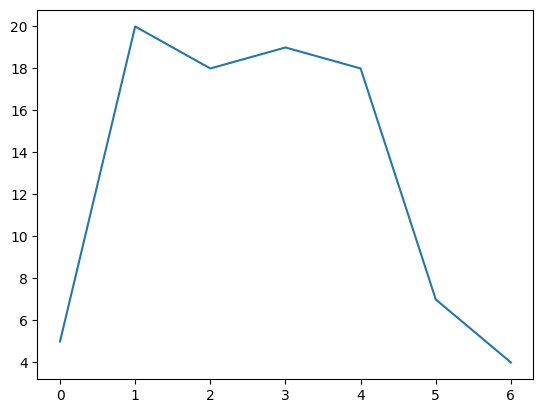

In [263]:
p.plot(y)

Now compute the area using the [composite trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule):

In [267]:
area = integrate.trapezoid(y, dx = 2)
print("area =", area)

area = 173.0


The argument `dx` defines the spacing between points of the curve (the x-axis values). The default is 1 (don't forget to check out the documentation: `?integrate.trapezoid`). Changing this will change the area, of course:

In [273]:
area = integrate.trapezoid(y, dx = 1)
print("area =", area)

area = 86.5


In [274]:
area = integrate.trapezoid(y, dx = 3)
print("area =", area)

area = 259.5


Now, the same, using [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule):

In [277]:
area = integrate.simpson(y, dx = 2)
print("area =", area)

area = 176.66666666666666


In [278]:
area = integrate.simpson(y, dx = 1)
print("area =", area)

area = 88.33333333333333


In [279]:
area = integrate.simpson(y, dx = 3)
print("area =", area)

area = 265.0


```{note}
There are alternatives to matplotlib for visualizations in Python. Check out [`bokeh`](https://bokeh.pydata.org/en/latest), [`plotly`](https://plot.ly/) and [`altair`](https://altair-viz.github.io/). Also, there is seaborn, which is built directly on Matplotlib. Examples using `seaborn` can be found in some of the appendices of these notes.
```

##### The Lotka-Volterra model

Now let's try numerical integration in Python for solving a classical model in biology — the Lotka-Volterra (LV) model for a predator-prey system in two-dimensional space (e.g., on land). The LV model is: 

\begin{align}
    \frac{dR}{dt} &= r R - a C R  \nonumber \\
    \frac{dC}{dt} &= - z C + e a C R
\end{align}

where, 

* $C$ and $R$ are consumer (e.g., predator) and resource (e.g., prey) population abundances (either number $\times$ area$^{-1}$ ).
* $r$ is the intrinsic (per-capita) growth rate of the resource population (time$^{-1}$).
* $a$ is per-capita "search rate" for the resource ($\text{area}\times \text{time}^{-1}$)  multiplied by its attack success probability, which determines the encounter and consumption rate of the consumer on the resource.
* $z$ is mortality rate ($\text{time}^{-1}$) and $e$ is the consumer's efficiency (a fraction) in converting resource to consumer biomass.

We have already imported scipy above (`import scipy as sc`) so we can proceed to solve the LV model using numerical integration. 

First, import `scipy`'s `integrate` submodule:

Now define a function that returns the growth rate of consumer and resource population at any given time step.

In [280]:
def dCR_dt(pops, t=0):

    R = pops[0]
    C = pops[1]
    dRdt = r * R - a * R * C 
    dCdt = -z * C + e * a * R * C
    
    return np.array([dRdt, dCdt])

In [281]:
type(dCR_dt)

function

So `dCR_dt` has been stored as a function object in the current Python session, all ready to go. 

Now assign some parameter values:

In [282]:
r = 1.
a = 0.1 
z = 1.5
e = 0.75

Define the time vector; let's integrate from time point 0 to 15, using 1000 sub-divisions of time:

In [283]:
t = np.linspace(0, 15, 1000)

Note that the units of time are arbitrary here. 

Set the initial conditions for the two populations (10 resources and 5 consumers per unit area), and convert the two into an array (because our `dCR_dt` function take an array as input). 

In [284]:
R0 = 10
C0 = 5 
RC0 = np.array([R0, C0])

Now numerically integrate this system forward from those starting conditions: 

In [285]:
pops, infodict = integrate.odeint(dCR_dt, RC0, t, full_output=True)

In [286]:
pops

array([[10.        ,  5.        ],
       [10.07578091,  4.94421976],
       [10.1529783 ,  4.88948321],
       ...,
       [ 9.99869712, 17.56204194],
       [ 9.8872779 , 17.3642589 ],
       [ 9.78000354, 17.16658946]])

So `pops` contains the result (the population trajectories).  Also check what's in infodict (it's a  dictionary with additional information)

In [287]:
type(infodict)

dict

In [288]:
infodict.keys()

dict_keys(['hu', 'tcur', 'tolsf', 'tsw', 'nst', 'nfe', 'nje', 'nqu', 'imxer', 'lenrw', 'leniw', 'mused', 'message'])

Check what the `infodict` output is by reading the help documentation with `?scipy.integrate.odeint`. For example, you can return a message to screen about whether the integration was successful: 

In [289]:
infodict['message']

'Integration successful.'

So it worked, great! 

But we would like to visualize the results. Let's do it using the `matplotlib` package. 

Again, to visualize the results of your numerical simulations in Python (or for data exploration/analyses), you can use `matplotlib`, which uses Matlab like plotting syntax.

First import the package:

In [290]:
import matplotlib.pylab as p

Now open an empty figure object (analogous to an R graphics object).

In [291]:
f1 = p.figure()

<Figure size 640x480 with 0 Axes>

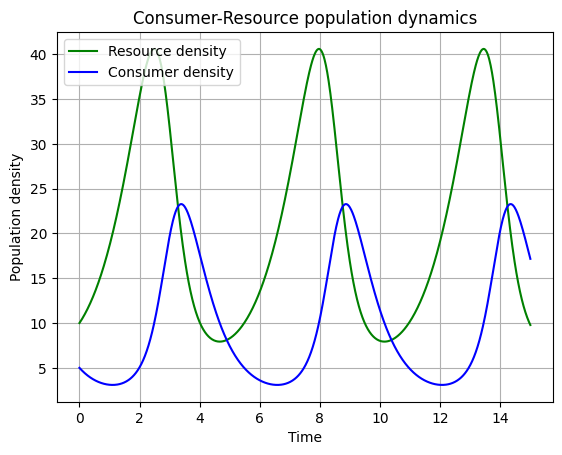

In [292]:
p.plot(t, pops[:,0], 'g-', label='Resource density') # Plot
p.plot(t, pops[:,1]  , 'b-', label='Consumer density')
p.grid()
p.legend(loc='best')
p.xlabel('Time')
p.ylabel('Population density')
p.title('Consumer-Resource population dynamics')
p.show()# To display the figure

Finally, save the figure as a pdf:

In [293]:
f1.savefig('../results/LV_model.pdf') #Save figure

```{tip} 
You can use many other graphics output formats in matplotlib; check the documentation of `p.savefig`.
```

## Practicals

1. Create a self-standing script using the above example and save it as `LV1.py` in your code directory. In addition to generating the above figure, it should also generate the following figure: 

---
:::{figure-md} LV-phase-plot


<img src="./graphics/LV_model_CR.png" alt="Lotka-Volterra phase plot" width="400px">

**Generate this figure as part of the `LV1.py` script.** 

:::

---

It should save both figures in pdf to the `results` directory, *without displaying them on screen*.

## The need for speed: profiling code

Donald Knuth says: *Premature optimization is the root of all evil*. 

Indeed, computational speed may not be your initial concern. Also, you should focus on developing clean, reliable, reusable code rather than worrying first about how fast your code runs. However, speed will become an issue when and if your analysis or modeling becomes complex enough (e.g., food web or large network simulations). In that case, knowing which parts of your code take the most time is useful – optimizing those parts may save you lots of time. 

### Profiling

To find out what is slowing down your code you need to "profile" your code: locate the sections of your code where  speed bottlenecks exist. 

Profiling is easy in `ipython` – simply use the command: 

```python
%run -p your_function_name
```

Let's write an illustrative program (name it `profileme.py`) and run it:

In [294]:
def my_squares(iters):
    out = []
    for i in range(iters):
        out.append(i ** 2)
    return out

def my_join(iters, string):
    out = ''
    for i in range(iters):
        out += string.join(", ")
    return out

def run_my_funcs(x,y):
    print(x,y)
    my_squares(x)
    my_join(x,y)
    return 0

run_my_funcs(10000000,"My string")

10000000 My string


0

Look carefully at what each of these functions does. 

Now run the script with `run -p profileme.py`, and you should see something like: 

```bash
        20000063 function calls (20000062 primitive calls) in 9.026 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.335    3.335    3.732    3.732 profileme.py:1(my_squares)
        1    2.698    2.698    5.200    5.200 profileme.py:7(my_join)
 10000001    2.502    0.000    2.502    0.000 {method 'join' of 'str' objects}
 10000008    0.397    0.000    0.397    0.000 {method 'append' of 'list' objects}
        1    0.093    0.093    9.025    9.025 profileme.py:13(run_my_funcs)
[more output]
```
The column headings in the profiling results are:

| Column name | Meaning |
| :- | -  |
| `filename:lineno(function)` | The filename, line number, and function name|
| `ncalls`  | Number of times the function was called |
| `tottime` | Total time spent in the function (excluding time spent in calls to sub-functions of that function)|
| `percall` | `tottime` divided by `ncalls`|
| `cumtime` | Cumulative time spent in the function *and* all its sub-functions|
| `percall` | `cumtime` divided by `ncalls`|

(Please also see the official Python [documentation](https://docs.python.org/3.6/library/profile.html)) 

The difference between `tottime` and `cumtime` columns often holds the most important information about performance. For example, in the above output, `cumtime` is much higher than `tottime` for `my_join` than for `my_squares`. This is because the sub-function (method) `join` is taking an additional 2.502 seconds (due to 10000001 calls), giving a `cumtime` of 2.698 + 2.502 = 5.2 seconds. In comparison, the sub-function (method) `append` is taking an additional 0.397 seconds (due to 10000008 calls), giving a `cumtime` of 3.335 + 0.397 = 3.732 seconds. Note also that the `tottime`s for `join` and `append` include the "overhead" of running their respective loop.

Thus, we can infer that the `my_join` function is hogging most of the time, followed by `my_squares`, and furthermore, that its the string method `join` that is slowing `my_join` down, and list method `append` that is slowing `my_squares` down. In other words, `.join`ing the string, and `.append`ing values to a list repeatedly are both not particularly fast, though the latter is less costly.

Can we do better? *Yes!* 

Let's try this alternative approach to writing the program (save it as `profileme2.py`, and again, run it):

In [295]:
def my_squares(iters):
    out = [i ** 2 for i in range(iters)]
    return out

def my_join(iters, string):
    out = ''
    for i in range(iters):
        out += ", " + string
    return out

def run_my_funcs(x,y):
    print(x,y)
    my_squares(x)
    my_join(x,y)
    return 0

run_my_funcs(10000000,"My string")

10000000 My string


0

We did two things: converted the loop to a list comprehension, and replaced the `.join` with an explicit string concatenation.

Now profile this program (`run -p profileme2.py`), and you should get something like:

```bash
        64 function calls (63 primitive calls) in 4.585 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.497    2.497    2.497    2.497 profileme2.py:2(<listcomp>)
        1    1.993    1.993    1.993    1.993 profileme2.py:5(my_join)
        1    0.094    0.094    4.584    4.584 profileme2.py:11(run_my_funcs)
[more output]
```

Woo hoo! So we about halved the time! Not quite enough to grab a pint, but ah well...
 
$\star$ Another approach would be to preallocate a `numpy` array instead of using a list for `my_squares` - *Try it*

You can also modify how the profiling results are displayed, and more, by using flags. For example, `-s` allows sorting the report by a particular column,  `-l`  limits the number of lines displayed or filters the results by function name, and `-T` saves the report in a text file.

For example, try 

```python
run -p -s cumtime profileme2.py
```
This will do the profiling and display the results sorted by `cumtime`.   

### Profiling without ipython 

You may want to execute the code that you need to profile from outside IPython (e.g., using a bash script). In this case, we you can use the module cProfile (ipython actually uses this when you do `%run -p`). 

here is an example (run from bash): 

```bash
python3 -m cProfile profileme2.py
```

Or, 

```bash
python3 -m cProfile -o profires myscript.py
```
Here the results are stored in a file called `profires`, which can be read using the `pstats` module. Read the documentation of `cProfile` and `pstats` modules; there are many analyses you can perform on such exported  profiling reports.

### Quick profiling with `timeit`

Additionally, you can use the `timeit` module if you want to figure out what the best way to do something specific as part of a larger program (say a particular command or a loop) might be.

Type and run the following code in a python script called `timeitme.py`:

```python
##############################################################################
# loops vs. list comprehensions: which is faster?
##############################################################################

iters = 1000000

import timeit

from profileme import my_squares as my_squares_loops

from profileme2 import my_squares as my_squares_lc

##############################################################################
# loops vs. the join method for strings: which is faster?
##############################################################################

mystring = "my string"

from profileme import my_join as my_join_join

from profileme2 import my_join as my_join

```
Note how we imported the functions using `from profileme import my_squares as my_squares_loops`, etc., which highlights the convenience of Python's elegant object-oriented approach.

Now run the two sets of comparisons using `timeit()` in ipython and make sure every line makes sense:

```python
%timeit my_squares_loops(iters)
%timeit my_squares_lc(iters)
%timeit (my_join_join(iters, mystring))
%timeit (my_join(iters, mystring))
```

Note that embedding the `%timeit()` commands within the script won't work calling magic commands from inside a script is not a good idea!

Of course, a simple approach would have been to time the functions like this:

```python 
import time
start = time.time()
my_squares_loops(iters)
print(f"my_squares_loops takes {time.time() - start} s to run.")

start = time.time()
my_squares_lc(iters)
print(f"my_squares_lc takes {time.time() - start} s to run.")
```
But you'll notice that if you run it multiple times, the time taken changes each time. So `timeit` takes a sample of runs and returns the average, which is better.

*But remember, don't go crazy with profiling for the sake of shaving a couple of milliseconds, tempting as that may be!*

## Vectorization revisited

We have now had fairly extensive practice in iteratively creating solutions to problems using for loops. Thus far all our problems have been mathematically quite straightforward, and not very computationally intensive. As you begin to move on from your taught modules into project work, you may find yourselves solving larger and more complex problems, at which point you will start to discover that for-loops have a fundamental weakness - speed!

In a nutshell, there are two issues keeping loops slow:

* Producing solutions to a large problem one loop iteration at a time means that our scripts and functions spend a lot of time doing stuff other than actually solving the problem we want them to solve - e.g. shuffling data around between variables in each loop iteration, or storing the result of the current loop's calculations in a (sometimes temporary) variable.
* Loops (at least in Python) are not generally able to take advantage of the parallel computing capabilities of modern-day computers, and thus must literally compute a solution one loop iteration at a time. vectorized functions tend to be optimised to spread their computations over multiple processors/threads, which can be much faster!

These issues become especially pronounced in the case of nested loops - which often appear in more spatially-explicit problems or time-dependent ones.

The following two examples will showcase the difference in runtime between a loop method and a vectorized method using numpy. The first is a relatively simple (if artificial) problem, intended to demonstrate basically at-a-glace the difference between the two approaches. The second is taken from current research on metabolic models of bacterial communities.

#### An example

Let us imagine we have two simple 1D arrays $a = (a_1, a_2, ... , a_N)$ and $b = (b_1, b_2, ... ,b_N)$, each of length N, and that we want to calculate a new array $c$ in which each entry is just the product of the two corresponding entries in $a$ and $b$:

$$c = (a_1 \times b_1, a_2 \times b_2, ... , a_N \times b_N)$$

This operation is called the *entrywise* product of $a$ and $b$.

Below are a loop-based function and a vectorized function to calculate the entrywise product of two 1D arrays of the same length. We will test them both on larger and larger 1D arrays to see how the vectorized approach is faster.

In [296]:
def loop_product(a, b):
    N = len(a)
    c = np.zeros(N)
    for i in range(N):
        c[i] = a[i] * b[i]   
    return c


def vect_product(a, b):
    return np.multiply(a, b)

The `multiply` function from numpy is a vectorized implementation of the elementwise product that we have explicitly written in the function `loop_product` above it. In general, numpy is an excellent choice for vectorized implementations of functions involving matrix maths (or maths using higher-dimensional analogues of matricies).

Let's try comparing the runtimes of `loop_product` and `vect_product` on increasingly large randomly-generated 1D arrays:

In [297]:
import timeit

array_lengths = [1, 100, 10000, 1000000, 10000000]
t_loop = []
t_vect = []

for N in array_lengths:
    print(f"\nSet {N=}")
    #randomly generate our 1D arrays of length N
    a = np.random.rand(N)
    b = np.random.rand(N)
    
    # time loop_product 3 times and save the mean execution time.
    timer = timeit.repeat('loop_product(a, b)', globals=globals().copy(), number=3)
    t_loop.append(1000 * np.mean(timer))
    print(f"Loop method took {t_loop[-1]} ms on average.")
    
    # time vect_product 3 times and save the mean execution time.
    timer = timeit.repeat('vect_product(a, b)', globals=globals().copy(), number=3)
    t_vect.append(1000 * np.mean(timer))
    print(f"vectorized method took {t_vect[-1]} ms on average.")


Set N=1
Loop method took 0.0033234013244509697 ms on average.
vectorized method took 0.0022474006982520223 ms on average.

Set N=100
Loop method took 0.040193606400862336 ms on average.
vectorized method took 0.0016125966794788837 ms on average.

Set N=10000
Loop method took 4.022401399561204 ms on average.
vectorized method took 0.0858539977343753 ms on average.

Set N=1000000
Loop method took 384.72996639902703 ms on average.
vectorized method took 7.79655639489647 ms on average.

Set N=10000000
Loop method took 4126.211678393884 ms on average.
vectorized method took 100.99498260242399 ms on average.


Phew! That last one just exploded in terms of the time it took!

Now let's compare the timings on a plot:

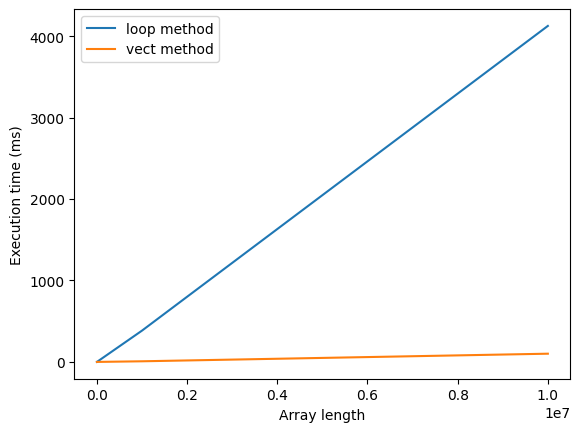

In [298]:
p.figure()
p.plot(array_lengths, t_loop, label="loop method")
p.plot(array_lengths, t_vect, label="vect method")
p.xlabel("Array length")
p.ylabel("Execution time (ms)")
p.legend()
p.show()

### When to vectorize?

Thus vectorizing your code can have it running in a fraction of the time it otherwise would. Why not always vectorize then?

Generally, you should follow the same principles as with any code profiling: don't spend time speeding up code that isn't slow in the first place, or code which you will probably not need to run more than a small number of times.

#### "No free lunch!"

There are trade-offs to vectorizing, most notably memory usage. One downside of calculating many steps simultaneously is that your computer needs to hold much more in memory in order to do it. If you try to vectorize a problem thats *too* large, you will probably run into memory errors. One easy example is to re-run the above example, but make it **even bigger**:

```python
N = 1000000000

a = np.random.rand(N)
b = np.random.rand(N)
c = vect_product(a, b)

# if no error, remove a, b, c from memory.
del a
del b
del c
```

This will almost certainly return a memory error (i.e. your computer ran out of RAM in which to store the entirety of the very large arrays $a$, $b$ and $c$ while it was still calculating (if you didn't get an error, try again with an extra 0 in $N$).

Again, this is a rather contrived example - you probably won't be taking element-wise products of arrays with a billion entries in your research - but more complex problems can easily become too big for memory while still remaining biologically reasonable!

*Check out the CMEE module on High Performance Computing to learn about using Imperial College's supercomputing cluster to run extremely large problems*

```{tip}
You can use the `multiprocessing` package for parallelizing your code on your own computer. 
```

## Practicals

### The Lotka-Volterra model revisited

*What happens when the Consumer population $C$ goes extinct in the Lotka-Volterra that you encountered above*? 

If the consumer population goes extinct, the resources grow to infinity! This is not biologically realistic, of course. To address this, we can introduce density dependence to the resource population $\left(1 - \frac{R} {K}\right)$, which changes the ODE system to

\begin{align}
    \frac{dR}{dt} &= r R \left(1 - \frac{R} {K}\right) - a C R\\
    \frac{dC}{dt} &= - z C + e a C R
\end{align}

The new parameter $K$ is the resource population's carrying capacity, which sets the upper limit on how large $R$ can get if the consumers go extinct. Basically, if you look carefully at the term $r R \left(1 - \frac{R} {K}\right)$, you can see that when $N = K$, the term in the brackets goes to zero, and the resource population stops growing. 

Your task in this practical is to copy and modify `LV1.py` into another script called `LV2.py` that has the following features:

*  It takes arguments for the four LV model parameters $r$, $a$, $z$, $e$, $K$ from the command line:
```
LV2.py arg1 arg2 ... etc
```
*  It runs our modified Lotka-Volterra model with resource density dependence.
*  It saves the plot as `.pdf` in an appropriate location.
*  The chosen parameter values should show in the plot (e.g., $r = 1, a = .5 $, etc) You can change time length $t$ too. 
* The parameters values should be adjusted such that both predator and prey persist with prey density dependence ( the final (non-zero) population values should be printed to screen). Try out different values of $K$ and exlore the model's behavior. One thing you might find is that that there is a critical value of $K$ below which the consumer and resource population just cannot coexist (both go extinct).  

Also, include a script that runs both `LV1.py` and `LV2.py` with appropriate arguments. This script should also profile the two scripts and print the results to screen for each of the scripts using the `%run -p` approach. Look at and compare the speed bottlenecks in `LV1.py` and `LV2.py`. *Think about how you could further speed up the scripts.*


### Groupwork practical: Compare R and Python Vectorization

Implement the Python versions of `Vectorize1.R`and ` Vectorize2.R` [from the R Chapter](R-Vectorization) (call them `Vectorize1.py` and `Vectorize2.py` respectively). Then write a shell script that compares the computational speed of the four scripts. the script should display meaningful summary of the results in the terminal. In particular, it should print the timings of the equivalent R and Python functions (not just the timing of the R and Python scripts as a whole).

### Groupwork practical: Discrete time LV Model

*Write every subsequent extra credit script file with a new name such as `LV3.py`,`LV4.py`, etc.* 

* Write a discrete-time version of the LV model called `LV3.py`. The discrete-time model is:

\begin{align} 
    R_{t+1} &= R_t (1 + r \left(1 - \frac{R_t}{K}\right) - a C_t)\\ 
    C_{t+1} &= C_t (1 - z + e a R_t) 
\end{align}

Include this script in `run_LV.py`, and profile it as well.

### Groupwork practical: Discrete time LV model with stochasticity

* Write a version of the discrete-time model (which you implemented in `LV3.py`) simulation with a random gaussian fluctuation in resource's growth rate at each time-step:

\begin{align}
        R_{t+1} &= R_t (1 + (r + \epsilon) \left(1 - \frac{R_t}{K}\right)- a C_t)\\
        C_{t+1} &= C_t (1 - z + e a R_t)
\end{align}

where $\epsilon$ is a random fluctuation drawn from a gaussian distribution (use `sc.stats` or `np.random`). Include this script in ` run_LV.py`, and profile it as well. You can also add fluctuations to both populations simultaneously this way: 

\begin{align}
    R_{t+1} &= R_t (1 + (r + \epsilon)  \left(1 - \frac{R_t}{K}\right) - a C_t)\\
    C_{t+1} &= C_t (1 - (z + \epsilon) + e a R_t)
\end{align}

*As always, test, add, commit and push all your new code and data to your git repository.*

(Python_II:python-regex)=
## Regular expressions in Python

Let's shift gears now, and look at a very important tool set that you should learn, or at least be aware of — *Regular expressions*. 

Regular expressions (regex) are a tool to find patterns (not just a particular sequence of characters) in strings. For example, `your@email.com` is a specific sequence of characters, but, in fact, all email addresses have such a pattern: alphanumeric characters, a "@", alphanumeric characters, a ".", alphanumeric characters. Using regex, you can search for all email addresses in a text file by searching for this pattern.    

There are many uses of regex, such as:

* Parsing (reading) text files and finding and replacing or deleting specific patterns 
* Finding DNA motifs in sequence data
* Navigating through files in a directory
* Extracting information from html and xml files

Thus, if you are interested in data mining, need to clean or process data in any other way, or convert a bunch of information into usable data, knowing regex is absolutely necessary.

---

:::{figure-md} XKCD-on-Regex

<img src="./graphics/regex.png" alt="XKCD on Regex" width="400px">

**Regular expressions can really improve your quality of life.**<br> (Source: [XKCD](https://www.xkcd.com/208/)) 

:::

---



Regex packages are available for most programming languages (recall [`grep` in UNIX](Using-grep); that is how regex first became popular).

### Metacharacters vs. regular characters

A regex may consist of a combination of special "metacharacters" (modifiers) and "regular" or literal characters. There are 14 metacharacters: 

|Metacharacter|Description|
|:-|:-|
|`[` `]` |	Used to enclose a specific character "class" — the set of characters that you wish to match. For example,  `[12]` means match target to "1" and if that does not match then match target to "2"; `[0-9]` means match to any character in range "0" to "9"|
|`\`|	Inhibits the "specialness" of a (meta)character so that it can be interpreted literally. So, for example, use `\.` to match an actual period, and  `\\` to match an actual back slash. |
| `.` |	Match any character except line break (newline); e.g.,	`he..o` will match *hello* as well as *he12o*	|
|`^` |	Indicates that the string to be matched is at the start of a longer string; e.g., `^hello` will match "hello" in "hello fellow!", but not in "fellow, hello!" |
|`$` |	Match the end of a string; for example, `world$` will match "world" in "Hello world", but not in "Hello world!"  	|
|`*` |	Match zero or more occurrences of the character or pattern that precedes it.|
|`+` |	Match 1 or more occurrences of the character or pattern that precedes it.|
|`?`| Match the preceding pattern element zero *or* one times|
|`{` `}`| Match exactly the specified number of occurrences; e.g., `.{2}` finds the first two instances of any character (except newline)|
| `|`|	Match either or	|
|`(` `)`|	Capture and group; examples of this appear below |	 	 

Everything other than these metacharacters is interpreted literally (e.g., *a* is matched by entering `a` in the regex) &ndash; a regular character. 

```{note} 
**The difference between `*`, `+`, and `?`**: 
`*` matches zero or more times, so whatever's being repeated may *not* be present at all, while `+` *requires* at least one occurrence. So, for example, `ra+t` will match "rat" (one 'a' is present) and "raaat" (three "a"s), but won't match "rt". On the other hand, `?` matches a pattern either once or zero times, so it makes the pattern matching more flexible. For example, `home-?brew` matches either "homebrew" or "home-brew".
```

### Regex special sequences

Along with inhibiting the "specialness" of a metacharacter so that it can be interpreted literally (see examples in table above), the backslash (`\`) can be followed by various standard character types to denote various *special sequences*. 

Below is a list of *commonly encountered* special sequences in [Unicode](https://en.wikipedia.org/wiki/Unicode) string patterns. For a complete list look [here](https://docs.python.org/3/library/re.html#re-syntax).

|Sequence|Description|
|:-|:-|
|`\d`| Matches any numeric (integer); this is equivalent to the regex class [0-9]|
|`\D`| Matches any non-digit character not covered by ` \d` (i.e., match a non-digit); this is equivalent to the class [^0-9]|
|`\n`| Matches a newline|
|`\t`| Matches a tab space|
|`\s`|Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v]| 
|`\S`| Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v]|
|`\w`| Matches any "alphanumeric" character (including underscore); this is equivalent to the class [a-zA-Z0-9_]|
|`\W`| Matches any non-alphanumeric character not covered by `\w`, i.e., any non-alphanumeric character excluding underscore, such as `?`, `!`, `+`, `<`, etc. ; this is equivalent to the class [^a-zA-Z0-9_]|

In the above table, 
* `\r` stands for a "[carriage-return](https://en.wikipedia.org/wiki/Carriage_return#Computers)", which is usually (but not always) the same as as a newline (`\n`);
* `\f` stands fior ["form feed"](https://en.wikipedia.org/wiki/Page_break) (or a page break character)
* `\v` stands for  ["vertical whitespace"](https://en.wikipedia.org/wiki/Whitespace_character), which includes all characters treated as line breaks in the Unicode standard.

These are rarely encountered, but can exist in certain text files.

```{note}
The reason why we have specified underscore as belonging to `\w` (i.e., the regex set [A-Za-z0-9_]) is because this is the specification of this class in Python regex in particular. This class definition is shared by most, but not all regex "flavors" (i.e., regex in other languages, such as Perl or Bash (recall `grep`)). The goal is to not to worry about it, but to keep in mind that `\w` will also match any pattern that includes one or more `_`'s!    
```

### Some regex examples

So combining metacharacters, regular characters and special sequences allows you to find pretty much any pattern. Here are some examples:

|Regex|Description|
|:-|:-|
|`aX9`| match the character string *aX9* exactly (case sensitively)| 
|`aX9\n`| match the character string *aX9*  (case sensitively) followed by a newline| 
|`8`| match the number *8*|
|`\d8`| match the number *8* preceded by any decimal number|
|`[atgc]` | match any character listed: `a`, `t`, `g`, `c`|
| `at|gc`  | match `at` or `gc`|
|`[^atgc]`| match any character not listed: any character except `a`, `t`, `g`, `c`|
| `[^a-z]` | match everything except lower case *a* to *z* |
| `[^Ff]`| match anything except upper or lower case *f* | 
|`\w{n}`| match the preceding pattern  element (any alphanumeric character) *exactly* `n` times|
|`\w{n,}`| match the preceding pattern element (any alphanumeric character) *at least* `n` times|
|`\w{n,m}`| match the preceding pattern element (any alphanumeric character) at least `n` but not more than `m` times|

```{tip}
Metacharacters are not active inside classes. For example, `[a-z$]` will match any of the characters `a` to `z`, but also `$`, because inside a character class it loses its special metacharacter status.
```

### Regex in Python

Regex functions in python are in the module `re`. 

Let's import it:

In [299]:
import re

The simplest `python` regex function is `re.search`, which searches the string for match to a given pattern — returns a *match object* if a match is found and `None` if not. Thus, the command `match = re.search(pat, str)` finds matches of the pattern `pat` in the given string `str` and stores the search result in a variable named `match`.

```{tip} 
**Always** put `r` in front of your regex — it tells python to read the regex in its "raw" (literal) form. Without raw string notation (`r"text"`), every backslash (`\`) in a regular expression would have to be prefixed with another one to escape it. Read more about this [here](https://docs.python.org/3.5/library/re.html).
```

OK, let's try some regexes (type all that follows in `regexs.py`):

In [300]:
my_string = "a given string"

Find a space in the string:

In [301]:
match = re.search(r'\s', my_string)
print(match)

<re.Match object; span=(1, 2), match=' '>


That's only telling you that a match was found (the object was created successfully). 

To see the match, use:

In [302]:
match.group()

' '

Now let's try another pattern:

In [303]:
match = re.search(r'\d', my_string)

In [304]:
print(match)

None


No surprise, because there are no numeric characters in our string!

To know whether a pattern was matched, we can use an `if`:

In [305]:
MyStr = 'an example'

match = re.search(r'\w*\s', MyStr) # what pattern is this?

if match:                      
    print('found a match:', match.group()) 
else:
    print('did not find a match')    

found a match: an 


Here are some more regexes (add all that follows to `regexs.py`):

In [306]:
match = re.search(r'2' , "it takes 2 to tango")
match.group()

'2'

In [307]:
match = re.search(r'\d' , "it takes 2 to tango")
match.group()

'2'

In [308]:
match = re.search(r'\d.*' , "it takes 2 to tango")
match.group()

'2 to tango'

In [309]:
match = re.search(r'\s\w{1,3}\s', 'once upon a time')
match.group()

' a '

In [310]:
match = re.search(r'\s\w*$', 'once upon a time')
match.group()

' time'

Let's switch to a more compact syntax by directly returning the matched group (by directly appending `.group()` to the result).

In [311]:
re.search(r'\w*\s\d.*\d', 'take 2 grams of H2O').group()

'take 2 grams of H2'

In [312]:
re.search(r'^\w*.*\s', 'once upon a time').group() # 'once upon a '

'once upon a '

 Note that *, `+`, and `{ }` are all "greedy":  They repeat the previous regex token as many times as possible. 

As a result, they may match more text than you want. To make it non-greedy and terminate at the first found instance of a pattern, use `?`:

In [313]:
re.search(r'^\w*.*?\s', 'once upon a time').group()

'once '

To further illustrate greediness in regexes, let's try matching an HTML tag:

In [314]:
re.search(r'<.+>', 'This is a <EM>first</EM> test').group()

'<EM>first</EM>'

But we wanted just `<EM>`!  

It's because `+` is greedy. Instead, we can make `+` "lazy":

In [315]:
re.search(r'<.+?>', 'This is a <EM>first</EM> test').group()

'<EM>'

OK, moving on from greed and laziness...

In [316]:
re.search(r'\d*\.?\d*','1432.75+60.22i').group()

'1432.75'

Note `\` before the `.`, to be able to find a literal `.` 

Otherwise, `re.search` will consider it to be a regex element (`.` means "match any character except newline").

A couple more examples:

In [317]:
re.search(r'[AGTC]+', 'the sequence ATTCGT').group()

'ATTCGT'

In [318]:
re.search(r'\s+[A-Z]\w+\s*\w+', "The bird-shit frog's name is Theloderma asper.").group()

' Theloderma asper'

---

:::{figure-md} Theloderma-asper

<img src="./graphics/thelodermaasper.JPG" alt="Bird-shit Frog" width="350px">

**In case you were wondering what *Theloderma asper*, the "bird-shit frog", looks like.** Samraat snapped this one in a North-East Indian rainforest ages ago. 

:::

---

How about looking for email addresses in a string? For example, let's try matching a string consisting of an academic's name, email address and research area or interest (no need to type this into any python file):

In [319]:
MyStr = 'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'
match = re.search(r"[\w\s]+,\s[\w\.@]+,\s[\w\s]+",MyStr)
match.group()

'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'

Note the use of `[ ]`'s: for example, `[\w\s]` ensures that any combination of word characters and spaces is found. 

Let's see if this regex works on a different pattern of email addresses: 

In [320]:
MyStr = 'Samraat Pawar, s-pawar@imperial.ac.uk, Systems biology and ecological theory'

In [321]:
match = re.search(r"[\w\s]+,\s[\w\.@]+,\s[\w\s]+",MyStr)
match.group()

AttributeError: 'NoneType' object has no attribute 'group'

Nope! So let's make the email address part of the regex more robust:

In [323]:
match = re.search(r"[\w\s]+,\s[\w\.-]+@[\w\.-]+,\s[\w\s]+",MyStr)
match.group()

'Samraat Pawar, s-pawar@imperial.ac.uk, Systems biology and ecological theory'

### Practicals: Some RegExercises

The following exercises are not for submission as part of your coursework, but we will discuss them in class on a subsequent day.

1. Try the regex we used above for finding names (`[\w\s]+`) for cases where the person's name has something unexpected, like a `?` or a `+`. Does it work? How can you make it more robust? 
* Translate the following regular expressions into regular English:
    * `r'^abc[ab]+\s\t\d'`
    * `r'^\d{1,2}\/\d{1,2}\/\d{4}$'`
    * `r'\s*[a-zA-Z,\s]+\s*'`
* Write a regex to match dates in format YYYYMMDD, making sure that:
    * Only seemingly valid dates match (i.e., year greater than 1900)
    * First digit in month is either 0 or 1
    * First digit in day $\leq 3$ 

### Grouping regex patterns 

You can group regex patterns into meaningful blocks using parentheses. Let's look again at the example of finding  email addresses.

In [324]:
MyStr = 'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'
match = re.search(r"[\w\s]+,\s[\w\.-]+@[\w\.-]+,\s[\w\s]+",MyStr)
match.group()

'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'

Without grouping the regex:

In [325]:
match.group(0)

'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'

Now create groups using `( )`:

In [326]:
match = re.search(r"([\w\s]+),\s([\w\.-]+@[\w\.-]+),\s([\w\s&]+)",MyStr)
if match:
    print(match.group(0))
    print(match.group(1))
    print(match.group(2))
    print(match.group(3))

Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory
Samraat Pawar
s.pawar@imperial.ac.uk
Systems biology and ecological theory


Nice! This is very handy for extracting specific patterns from text data. Note that we excluded the `,`'s and the `\s`'s from the grouping parentheses because we don't want them to be returned in the match group list. 

Have a look at `re4.py` in the TheMulQuaBio's code repository for more on parsing email addresses using regexes.

### Useful `re` commands

Here are some important functions in the `re` module:

|Command|What it does|
|:-|:-|
| `re.search(reg, text)`| Scans the string and finds the first match of the pattern, returning a `match` object if successful and `None` otherwise.|
| `re.match(reg, text)`| Like `re.search`, but only matches the beginning of the string.|
| `re.compile(reg)`| Compiles (stores) a regular expression for repeated use, improving efficiency.|
| `re.split(ref, text)`| Splits the text by the occurrence of the pattern described by the regular expression.|
| `re.findall(ref, text)`| Like `re.search`, but returns a list of all matches. If groups are present, returns a list of groups.|
| `re.finditer(ref, text)`| Like `re.findall`, but returns an iterator containing the match objects over which you can iterate. Useful for "crawling" efficiently through text till you find all necessary number of matches.|
| `re.sub(ref, repl, text)`|  Substitutes each non-overlapping occurrence of the match with the text in `repl`.|
|||

Many of these commands also work on whole contents of files. We will look at an example of this below. Let us try some particularly useful applications of some of these commands.

### Finding all matches

Above we used re.search() to find the first match for a pattern. In many scenarios, you will need to find *all* the matches of a pattern. The function `re.findall()` does precisely this and returns all matches as a list of strings, with each string representing one match.

Let's try this on an extension of the email example above for some data with multiple addresses: 

In [327]:
MyStr = "Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory; Another academic, a-academic@imperial.ac.uk, Some other stuff thats equally boring; Yet another academic, y.a_academic@imperial.ac.uk, Some other stuff thats even more boring"

Now `re.findall()` returns a list of all the emails found:

In [328]:
emails = re.findall(r'[\w\.-]+@[\w\.-]+', MyStr) 
for email in emails:
    print(email)

s.pawar@imperial.ac.uk
a-academic@imperial.ac.uk
y.a_academic@imperial.ac.uk


Nice! 

### Finding in files

You will generally be wanting to apply regex searches to whole files. You might be tempted to write a loop to iterate over the lines of the file, calling `re.findall()` on each line. However, `re.findall()` can return a list of all the matches in a single step. 

Let's try finding all species names that correspond to Oaks in a data file:

In [329]:
f = open('../data/TestOaksData.csv', 'r')
found_oaks = re.findall(r"Q[\w\s].*\s", f.read())

found_oaks

['Quercus, robur\n', 'Quercus, cerris\n', 'Quercus, petraea\n']

This works because recall that `f.read()` returns the whole text of a file in a single string). Also, the file is closed after reading.

### Groups within multiple matches

Grouping pattern matches using `( )` as you learned above, can be combined with `re.findall()`. If the pattern includes *two or more* groups, then instead of returning a list of strings, `re.findall()` returns a list of tuples. Each tuple represents one match of the pattern, and inside the tuple is group(1), group(2), etc.

Let's try it:

In [330]:
MyStr = "Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory; Another academic, a.academic@imperial.ac.uk, Some other stuff thats equally boring; Yet another academic, y.a.academic@imperial.ac.uk, Some other stuff thats even more boring"

found_matches = re.findall(r"([\w\s]+),\s([\w\.-]+@[\w\.-]+)", MyStr)
found_matches

[('Samraat Pawar', 's.pawar@imperial.ac.uk'),
 (' Another academic', 'a.academic@imperial.ac.uk'),
 (' Yet another academic', 'y.a.academic@imperial.ac.uk')]

In [331]:
for item in found_matches:
    print(item)

('Samraat Pawar', 's.pawar@imperial.ac.uk')
(' Another academic', 'a.academic@imperial.ac.uk')
(' Yet another academic', 'y.a.academic@imperial.ac.uk')


### Extracting text from webpages

OK, let's step up the ante here. How about extracting text from a web page to create your own data? Let's try extracting data from [this page](https://www.imperial.ac.uk/silwood-park/academic-staff/).

You will need a new package `urllib3`. Install it, and import it (also `import re` if needed). 

In [332]:
import urllib3

In [333]:
conn = urllib3.PoolManager() # open a connection
r = conn.request('GET', 'https://www.imperial.ac.uk/silwood-park/academic-staff/') 
webpage_html = r.data #read in the webpage's contents

This is returned as bytes (not strings). 

In [334]:
type(webpage_html)

bytes

So decode it (remember, the default decoding that this method applies is *utf-8*):

In [335]:
My_Data  = webpage_html.decode()
#print(My_Data)

That's a lot of potentially useful information! Let's extract all the names of academics:

In [336]:
pattern = r"Dr\s+\w+\s+\w+"
regex = re.compile(pattern) # example use of re.compile(); you can also ignore case  with re.IGNORECASE 
for match in regex.finditer(My_Data): # example use of re.finditer()
    print(match.group())

Dr Arkhat Abzhanov
Dr Arkhat Abzhanov
Dr Cristina Banks
Dr Martin Brazeau
Dr Martin Brazeau
Dr Lauren Cator
Dr Rob Ewers
Dr Rob Ewers
Dr Richard Gill
Dr Richard Gill
Dr Peter Graystock
Dr Peter Graystock
Dr Samraat Pawar
Dr Will Pearse
Dr Will Pearse
Dr Will Pearse
Dr Emma Ransome
Dr Emma Ransome
Dr Julia Schroeder
Dr Julia Schroeder
Dr Julia Schroeder
Dr Joseph Tobias
Dr Joseph Tobias
Dr Bonnie Waring
Dr Bonnie Waring
Dr Bonnie Waring
Dr Emma Cavan
Dr Emma Cavan
Dr Emma Caven
Dr Magda Charalambous
Dr Magda Charalambous
Dr Vassiliki Koufopanou
Dr Fengjie Liu
Dr David Orme
Dr Chris Wilson
Dr Michael Themis
Dr Michael Themis
Dr Aurelio Malo
Dr Aurelio Malo


Again, nice! However, its' not perfect. 

You can improve this by:
* Extracting Prof names as well
* Eliminating the repeated matches
* Grouping to separate title from first and second names
* Extracting names that have unexpected characters, such as in hyphenated names (a "-" in the name)

*Try making these improvements.*

Of course, you can match and extract other types of patterns as well, such as urls and email addresses (though this example web page does not have email addresses).

### Replacing text

Using the same web page data, let's try using the `re.sub` command on the same web page data (`My_Data`) to replace text:

In [337]:
New_Data = re.sub(r'\t'," ", My_Data) # replace all tabs with a space
# print(New_Data)

### Practicals

#### Blackbirds problem

Complete the code `blackbirds.py` that you find in the `TheMulQuaBio` (necessary data file is also there).

## Using Python to build workflows

You can use python to build an automated data analysis or simulation workflow that involves multiple languages, especially the ones you have already learnt: R, $\LaTeX$, and UNIX bash. For example, you could, in theory, write a single Python script to generate and update your masters dissertation, tables, plots, and all. Python is ideal for building such workflows because it has packages for practically every purpose.

*Thus this topic may be useful for your [Miniproject](Appendix-MiniProj.ipynb), which will involve building a reproducible computational workflow.*

### Using `subprocess`

For building a workflow in Python the `subprocess` module is key. With this module you can run non-Python commands and scripts, obtain their outputs, and also crawl through and manipulate directories. 

First, import the module (this is part of the python standard library, so you won't need to install it):

In [338]:
import subprocess

#### Running processes

There are two main ways to run commands through subprocess: `run` (available in Python 3.5 onwards) for basic usage, and `Popen` (`P`rocess `open`) for more advanced usage. We will work directly with `popen` because `run()` is a wrapper around `Popen`. Using `Popen` directly gives more control over how the command is run, and how its input and output are processed. 

Let's try running some commands in the UNIX bash. 

$\star$ In a terminal, first `cd` to your `code` directory,  launch `ipython3`, then and type:

In [339]:
p = subprocess.Popen(["echo", "I'm talkin' to you, bash!"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

This creates an object `p`, from which you can extract the output and other information of the command you ran. Before we do anything more, let's look at our `subprocess.popen` call carefully. 

* The command line arguments were passed as a list of strings, which avoids the need for escaping quotes or other special characters that might be interpreted by the shell (for example, in this case, there are apostrophes in the string that is being `echo`ed in bash).
* `stdout` is the output from the process "spawned" by your command. This is a sequence of bytes (which you will need to decode - more on this below). 
* `stderr` is the error code (from which you can capture whether the process ran successfully or not). The method PIPE creates a new "pipe" (literally, a connection) to the output of to the "child"  process.

In [340]:
stdout, stderr = p.communicate()

In [341]:
stderr

b''

Nothing here, because the echo command does no return an any code. the `b` indicates that the output is in bits (unencoded). By default, stdout, stderr (and other outputs of `p.communicate`) are returned as binary (byte) format.

Now check what's in `stdout`:

In [342]:
stdout

b"I'm talkin' to you, bash!\n"

Let's encode and print it.

In [343]:
print(stdout.decode())

I'm talkin' to you, bash!



You can also use a `universal_newlines = True` so that these outputs are returned as encoded text (default being *utf-8* usually), with  line endings converted to '\n'. For more information [see the documentation](https://docs.python.org/3.5/library/subprocess.html).

Let's try something else: 

In [344]:
p = subprocess.Popen(["ls", "-l"], stdout=subprocess.PIPE)
stdout, stderr = p.communicate()

Now use `print(stdout.decode())` to see the output.

Recall that the `ls -l` command lists all files in a long listing format. 

You can also call python itself from bash (!):

```python
p = subprocess.Popen(["python3", "boilerplate.py"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # A bit silly! 
stdout, stderr = p.communicate()

print(stdout.decode())
```

This should give you the output of your `boilerplate.py` script (remember, your current path will need to be in the appropriate code directory of the relevant week's directory). 

Similarly, to compile a $\LaTeX$ document (using `pdflatex` in this case), you can do something like:

```python
subprocess.os.system("pdflatex yourlatexdoc.tex")
```

### Running `R`

R is likely an important part of your project's analysis and data visualization components in particular — for example for statistical analyses and plotting. You can run `R` from Python easily:

$\star$ Create an R script file called `TestR.R` in your `code` directory with the following content:

```r
print("Hello, this is R!")
```

Then try running it from your bash terminal (*not* from the Python terminal) (e.g., using `Rscript TestR.R`). This should return in your terminal:

```bash
[1] "Hello, this is R!"`
```

Then the try `Rscript --verbose TestR.R`. Thhis should return something like:

```bash
  '/usr/lib/R/bin/R --no-echo --no-restore --file=TestR.R'

[1] "Hello, this is R!"
```

Thus the `--verbose` flag to `Rscript` prints out addtional information about the R script's execution. 

```{note}
It is possible that the location of `RScript` is different in your Unix/Linux system. To locate it, try `find /usr -name 'Rscript'` in the bash terminal (not in Python!). For example, you might need to specify the path to it using `/usr/lib/R/bin/Rscript`.
```

Now try:

```bash
Rscript --verbose TestR.R > ../results/TestR.Rout 2> ../results/TestR_errFile.Rout
```

Then check the contents of `TestR.Rout` and `TestR_errFile.Rout`. The former should contain the output of the R script, and the latter the additonal information produced due to the `--verbose` flag. 

Now try running this using subprocess instead:

In [345]:
subprocess.Popen("Rscript --verbose TestR.R > ../results/TestR.Rout 2> ../results/TestR_errFile.Rout", shell=True).wait()

0

There are two three new things here compared to what we did above when running a bash instead of a R command. Firtly, we are using `shell = True`. This is because we want subprocess to execute a non-standard bash command (RScript is not a stadard bash command) in the standard unix/linux shell. Secondly, we added `.wait()` to allow the RScript to terminate (this allows us to set timeout id necessary). Thirdly, we removed the  `stdout=subprocess.PIPE, stderr=subprocess.PIPE` bits, because they will not work when using `wait()`. Read [the documentation](https://docs.python.org/3/library/subprocess.html) tolearn more.

Now, create a script `TestR.py` with the following content :

In [346]:
import subprocess
p = subprocess.Popen("Rscript --verbose TestR.R > ../results/TestR.Rout 2> ../results/TestR_errFile.Rout", shell=True).wait()


Now run `TestR.py` (or `%cpaste`) and check`TestR.Rout` and `TestR_errorFile.Rout`.

Also check what happens if you run (type directly in `ipython` or `python` console):

In [347]:
subprocess.Popen("Rscript --verbose NonExistScript.R > ../results/outputFile.Rout 2> ../results/errorFile.Rout", shell=True).wait()

2

What do you see on the screen? 

Now open and check `outputFile.Rout`and `errorFile.Rout.


### Handling directory and file paths

You can also use `subprocess.os` to make your code OS (Linux, Windows, Mac) independent. For example to assign paths:

In [348]:
subprocess.os.path.join('directory', 'subdirectory', 'file')

'directory/subdirectory/file'

The result would be appropriately different on Windows (with backslashes instead of forward slashes).

Note that in all cases you can "catch" the output of `subprocess` so that you can then use the output within your
python script. A simple example, where the output is a platform-dependent directory path, is:

In [349]:
MyPath = subprocess.os.path.join('directory', 'subdirectory', 'file')
MyPath

'directory/subdirectory/file'

```{tip}
Explore the various commands within `subprocess` by hitting the tap key after typing `subprocess.`. Do the same for submodules, e.g., type `subprocess.os.` and then hit  the tab key.
```

### Practicals

#### Using `subprocess` to run a R script   

Open `fmr.R` and work out what it does; check that you have `NagyEtAl1999.csv`. Now write python code called `run_fmr_R.py` that:

Runs `fmr.R` to generate the desired result

`run_fmr_R.py` should also print to the python screen whether the run was successful, and the contents of the R console output

#### Using `os` to crawl directories

Open `using_os.py` and complete the tasks assigned (hint: you might want to look at `subprocess.os.walk()`)

## Readings and Resources

### General

* M. Fowler, Refactoring: improving the design of existing code (2000), Addison-Wesley Professional
* R. C. Martin, Clean code, A handbook of agile software craftsmanship (2009), Prentice Hall
* Browse the Python [tutorial](https://docs.python.org/3/tutorial)
* Shaw, Zed. 2017. Learn Python 3 the Hard Way: A Very Simple Introduction to the Terrifyingly Beautiful World of Computers and Code. Boston : Addison-Wesley (likely available in your University library)
* Python style guide from [the Hitchhiker's Guide to Python](https://docs.python-guide.org/writing/style)
* A very detailed style guide: [the Google Python Style Guide](https://google.github.io/styleguide/pyguide.html)

### IPython
* The IPython [documentation](https://ipython.readthedocs.io/en/stable)
* [Cookbooks](https://github.com/ipython/ipython/wiki) can be very useful

### Python data structures
* Read more about native Python data structures [here](https://diveintopython3.problemsolving.io/native-datatypes.html)

### Elements of the Python program 
* Read more about the python shebang [here](https://www.python.org/dev/peps/pep-0394/#recommendation)
* See the [official docstring conventions](https://www.python.org/dev/peps/pep-0257/)

### Errors and Debugging

* https://docs.python.org/3/tutorial/errors.html

### Functions, Modules, and Classes
* For functions vs. modules vs. classes in Python, have a look [at this]( http://learnpythonthehardway.org/book/ex40.html)

### Python Packages
* Look up <https://docs.python.org/3/library/index.html> – Read about the packages you think will be important to you

### Scientific computing

* In general, scores of good module/package-specific cookbooks are out there — google "cookbook" along with the name of the package you are interested in (e.g., "scipy cookbook").

* For SciPy, read the [official documentation](https://docs.scipy.org/doc/); in particular, read about the scipy [modules](https://docs.scipy.org/doc/scipy/reference/) you think will be important to you.

* The "ecosystem" for Scientific computing in python: <http://www.scipy-lectures.org/>

* Many great examples of applications in the [scipy cookbook](https://scipy-cookbook.readthedocs.io/)

* Scipy stats: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

* A Primer on Scientific Programming with Python <http://www.springer.com/us/book/9783642549595>; Multiple copies of this book are available from the central library and can be requested to Silwood from the IC library website. You can also find a pdf - seach online.

### Regular expressions

* Python regex documentation: https://docs.python.org/3.6/howto/regex.html

* Google's short class on regex in python: https://developers.google.com/edu/python/regular-expressions
And this exercise: https://developers.google.com/edu/python/exercises/baby-names

* Good intro to regex, tips and a great array of canned solutions: http://www.regular-expressions.info

* Use and abuse of regex: <https://blog.codinghorror.com/regex-use-vs-regex-abuse/>

### Other stuff

* [The matplotlib website](http://matplotlib.org)

* Alternatives to matplotlib for plotting in python: https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb

* Some of you might find the python package `biopython` particularly useful — check out <http://biopython.org/>, and especially, the cookbook